# Counting the number of parking functions where cars can move back $k$ spaces 
**Outline of Code**
- Define a function `parking_pref(n)` that lists the $n^n$ parking preferences 
- Define a function `cars_perm(x)` which takes in a parking preference and returns the list of spots the cars park in
    - Define `cars_perm(x,k)` which takes in a parking preference and integer and returns the list of spots the cars park in 
- Define a function `is_NPF(x)` that checks if a parking preference `x` is a Naples parking function
    -`is_PF_k(x,k)` that takes in a parking preference `x` and integer `k` and returns TRUE if `x` is a parking function where cars can back up $k$ spots
- `NPF(n)` returns the set of Naples parking functions of length $n$
    - PF_k(n,k) returns the set of parking functions of length $n$ where cars can back up `k` spots


#### Possibly slower version of parking_pref(n)

In [5]:
def parking_pref(n):
    mset = []
    for i in range(n):
        for j in range(n):
            mset.append(i+1)
    return Arrangements(mset,n).list()
    

In [6]:
def parking_pref(n):
    return Tuples(range(1,n+1),n).list()

In [7]:
Tuples(range(1,8),8).cardinality()

5764801

delete duplicates function

In [8]:
def delete_duplicates(X):
    seen=[]
    for i in range(len(X)):
        if X[i] not in seen:
            seen.append(X[i])
    return seen

In [9]:
def increasing_parking_pref(n):
    X=parking_pref(n)
    j=0
    for i in range(len(X)):
        X[i]=(sorted(X[i]))
    return delete_duplicates(X)

In [10]:
increasing_parking_pref(4)

[[1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 1, 1, 3],
 [1, 1, 1, 4],
 [1, 1, 2, 2],
 [1, 1, 2, 3],
 [1, 1, 2, 4],
 [1, 1, 3, 3],
 [1, 1, 3, 4],
 [1, 1, 4, 4],
 [1, 2, 2, 2],
 [1, 2, 2, 3],
 [1, 2, 2, 4],
 [1, 2, 3, 3],
 [1, 2, 3, 4],
 [1, 2, 4, 4],
 [1, 3, 3, 3],
 [1, 3, 3, 4],
 [1, 3, 4, 4],
 [1, 4, 4, 4],
 [2, 2, 2, 2],
 [2, 2, 2, 3],
 [2, 2, 2, 4],
 [2, 2, 3, 3],
 [2, 2, 3, 4],
 [2, 2, 4, 4],
 [2, 3, 3, 3],
 [2, 3, 3, 4],
 [2, 3, 4, 4],
 [2, 4, 4, 4],
 [3, 3, 3, 3],
 [3, 3, 3, 4],
 [3, 3, 4, 4],
 [3, 4, 4, 4],
 [4, 4, 4, 4]]

In [12]:
def decreasing_parking_pref(n):
    X=parking_pref(n)
    j=0
    for i in range(len(X)):
        X[i]=list(reversed(sorted(X[i])))
    return delete_duplicates(X)

In [13]:
def toDecreasing(X):
    return list(reversed(sorted(X)))

In [14]:
decreasing_parking_pref(4)

[[1, 1, 1, 1],
 [2, 1, 1, 1],
 [3, 1, 1, 1],
 [4, 1, 1, 1],
 [2, 2, 1, 1],
 [3, 2, 1, 1],
 [4, 2, 1, 1],
 [3, 3, 1, 1],
 [4, 3, 1, 1],
 [4, 4, 1, 1],
 [2, 2, 2, 1],
 [3, 2, 2, 1],
 [4, 2, 2, 1],
 [3, 3, 2, 1],
 [4, 3, 2, 1],
 [4, 4, 2, 1],
 [3, 3, 3, 1],
 [4, 3, 3, 1],
 [4, 4, 3, 1],
 [4, 4, 4, 1],
 [2, 2, 2, 2],
 [3, 2, 2, 2],
 [4, 2, 2, 2],
 [3, 3, 2, 2],
 [4, 3, 2, 2],
 [4, 4, 2, 2],
 [3, 3, 3, 2],
 [4, 3, 3, 2],
 [4, 4, 3, 2],
 [4, 4, 4, 2],
 [3, 3, 3, 3],
 [4, 3, 3, 3],
 [4, 4, 3, 3],
 [4, 4, 4, 3],
 [4, 4, 4, 4]]

Returning the order that the cars park in for a Naples parking

In [15]:
def cars_perm(x):
    n=len(x)
    parking_perm=[]
    for i in range(n):
        m=x[i]
        if m not in parking_perm:
            parking_perm.append(m)
        elif m in parking_perm and m-1 not in parking_perm and m-1>0:
            parking_perm.append(m-1)
        else:
            while m in parking_perm:
                m=m+1
            parking_perm.append(m)
        
    return parking_perm

Returning the order that the cars park in when cars can back up $k$ spots

In [16]:
def cars_perm_k(x,k):
    n=len(x)
    parking_perm=[]
    for i in range(n):
        m=x[i]
        parked_yet=False
        if m not in parking_perm:
            parking_perm.append(m)
        else:
            j=0
            while j in range(k) and parked_yet==False:
                j=j+1
                m=m-1
                if m==0:
                    break
                elif m not in parking_perm:
                    parking_perm.append(m)
                    parked_yet=True
            if parked_yet==False:
                m=x[i]
                while m in parking_perm:
                    m=m+1
                parking_perm.append(m)
    return parking_perm

In [17]:
cars_perm_k([10,10,9,8,9,4,5,9,10],1)

[10, 9, 8, 7, 11, 4, 5, 12, 13]

Check if a parking preference is a Naples parking function

In [18]:
def is_NPF(x):
    n=len(x)
    if n+1 in cars_perm(x):
        return False
    else:
        return True
        

Check if a parking preference is a parking function where cars can back up $k$ spots

In [19]:
def is_PF_k(x,k):
    n=len(x)
    if n+1 in cars_perm_k(x,k):
        return False
    else:
        return True

In [20]:
def NPF(n):
    NPFset=[]
    Prefs=parking_pref(n)
    for i in range(len(parking_pref(n))):
        if is_NPF(Prefs[i]):
            NPFset.append(Prefs[i])
    return NPFset

In [21]:
NPF(3)

[[1, 1, 1],
 [2, 1, 1],
 [3, 1, 1],
 [1, 2, 1],
 [2, 2, 1],
 [3, 2, 1],
 [1, 3, 1],
 [2, 3, 1],
 [3, 3, 1],
 [1, 1, 2],
 [2, 1, 2],
 [3, 1, 2],
 [1, 2, 2],
 [2, 2, 2],
 [3, 2, 2],
 [1, 3, 2],
 [2, 3, 2],
 [3, 3, 2],
 [1, 1, 3],
 [2, 1, 3],
 [3, 1, 3],
 [1, 2, 3],
 [2, 2, 3],
 [1, 3, 3]]

In [29]:
def PF_k(n,k):
    PFset=[]
    Prefs=parking_pref(n)
    for i in range(len(parking_pref(n))):
        if is_PF_k(Prefs[i],k):
            PFset.append(Prefs[i])
    return PFset

In [30]:
X=Arrangements([6,6,6,5,4,2,2],7)
[(X[n],is_NPF(X[n])) for n in range(len(X))]

[([6, 6, 6, 5, 4, 2, 2], True),
 ([6, 6, 6, 5, 2, 4, 2], True),
 ([6, 6, 6, 5, 2, 2, 4], True),
 ([6, 6, 6, 4, 5, 2, 2], False),
 ([6, 6, 6, 4, 2, 5, 2], False),
 ([6, 6, 6, 4, 2, 2, 5], False),
 ([6, 6, 6, 2, 5, 4, 2], True),
 ([6, 6, 6, 2, 5, 2, 4], True),
 ([6, 6, 6, 2, 4, 5, 2], False),
 ([6, 6, 6, 2, 4, 2, 5], False),
 ([6, 6, 6, 2, 2, 5, 4], True),
 ([6, 6, 6, 2, 2, 4, 5], False),
 ([6, 6, 5, 6, 4, 2, 2], True),
 ([6, 6, 5, 6, 2, 4, 2], True),
 ([6, 6, 5, 6, 2, 2, 4], True),
 ([6, 6, 5, 4, 6, 2, 2], True),
 ([6, 6, 5, 4, 2, 6, 2], True),
 ([6, 6, 5, 4, 2, 2, 6], True),
 ([6, 6, 5, 2, 6, 4, 2], True),
 ([6, 6, 5, 2, 6, 2, 4], True),
 ([6, 6, 5, 2, 4, 6, 2], True),
 ([6, 6, 5, 2, 4, 2, 6], True),
 ([6, 6, 5, 2, 2, 6, 4], True),
 ([6, 6, 5, 2, 2, 4, 6], True),
 ([6, 6, 4, 6, 5, 2, 2], False),
 ([6, 6, 4, 6, 2, 5, 2], False),
 ([6, 6, 4, 6, 2, 2, 5], False),
 ([6, 6, 4, 5, 6, 2, 2], False),
 ([6, 6, 4, 5, 2, 6, 2], False),
 ([6, 6, 4, 5, 2, 2, 6], False),
 ([6, 6, 4, 2, 6, 5, 2], Fal

In [31]:
lst=[]
for x in X:
    if is_NPF(x)==True:
        lst.append(x)
len(lst)

63

In [32]:
lst=[]
for x in NPF(6):
    for i in range(6):
        if x[i]==6:
            lst.append(x)
len(delete_duplicates(lst))

16942

## Naples parking polytope

In [43]:
P=Polyhedron(vertices=PF_k(4,0))
P.integral_points()

((1, 1, 1, 1),
 (1, 1, 1, 2),
 (1, 1, 1, 3),
 (1, 1, 1, 4),
 (1, 1, 2, 1),
 (1, 1, 2, 2),
 (1, 1, 2, 3),
 (1, 1, 2, 4),
 (1, 1, 3, 1),
 (1, 1, 3, 2),
 (1, 1, 3, 3),
 (1, 1, 3, 4),
 (1, 1, 4, 1),
 (1, 1, 4, 2),
 (1, 1, 4, 3),
 (1, 2, 1, 1),
 (1, 2, 1, 2),
 (1, 2, 1, 3),
 (1, 2, 1, 4),
 (1, 2, 2, 1),
 (1, 2, 2, 2),
 (1, 2, 2, 3),
 (1, 2, 2, 4),
 (1, 2, 3, 1),
 (1, 2, 3, 2),
 (1, 2, 3, 3),
 (1, 2, 3, 4),
 (1, 2, 4, 1),
 (1, 2, 4, 2),
 (1, 2, 4, 3),
 (1, 3, 1, 1),
 (1, 3, 1, 2),
 (1, 3, 1, 3),
 (1, 3, 1, 4),
 (1, 3, 2, 1),
 (1, 3, 2, 2),
 (1, 3, 2, 3),
 (1, 3, 2, 4),
 (1, 3, 3, 1),
 (1, 3, 3, 2),
 (1, 3, 3, 3),
 (1, 3, 4, 1),
 (1, 3, 4, 2),
 (1, 4, 1, 1),
 (1, 4, 1, 2),
 (1, 4, 1, 3),
 (1, 4, 2, 1),
 (1, 4, 2, 2),
 (1, 4, 2, 3),
 (1, 4, 3, 1),
 (1, 4, 3, 2),
 (2, 1, 1, 1),
 (2, 1, 1, 2),
 (2, 1, 1, 3),
 (2, 1, 1, 4),
 (2, 1, 2, 1),
 (2, 1, 2, 2),
 (2, 1, 2, 3),
 (2, 1, 2, 4),
 (2, 1, 3, 1),
 (2, 1, 3, 2),
 (2, 1, 3, 3),
 (2, 1, 3, 4),
 (2, 1, 4, 1),
 (2, 1, 4, 2),
 (2, 1, 4, 3),
 (2, 2, 1,

In [44]:
P.plot()

Graphics3d Object

### Counting

In [16]:
len(PF_k(8,1))

KeyboardInterrupt: 

In [66]:
[len(PF_k(8,n)) for n in range(1,6)]

[9057316, 11976466, 13902752, 15170350, 16000823]

In [162]:
[x for x in PF_k(4,2) if x not in PF_k(4,1)]

[[4, 3, 4, 1],
 [3, 4, 4, 1],
 [4, 4, 4, 1],
 [4, 3, 4, 2],
 [3, 4, 4, 2],
 [4, 4, 4, 2],
 [4, 3, 2, 3],
 [3, 4, 2, 3],
 [4, 4, 2, 3],
 [3, 2, 3, 3],
 [4, 2, 3, 3],
 [2, 3, 3, 3],
 [3, 3, 3, 3],
 [4, 3, 3, 3],
 [2, 4, 3, 3],
 [3, 4, 3, 3],
 [4, 4, 3, 3],
 [3, 2, 4, 3],
 [4, 2, 4, 3],
 [2, 3, 4, 3],
 [3, 3, 4, 3],
 [4, 3, 4, 3],
 [2, 4, 4, 3],
 [3, 4, 4, 3],
 [4, 4, 4, 3],
 [4, 3, 1, 4],
 [3, 4, 1, 4],
 [4, 4, 1, 4],
 [4, 1, 3, 4],
 [3, 2, 3, 4],
 [2, 3, 3, 4],
 [3, 3, 3, 4],
 [1, 4, 3, 4],
 [3, 1, 4, 4],
 [4, 1, 4, 4],
 [1, 3, 4, 4],
 [1, 4, 4, 4]]

In [163]:
len([x for x in PF_k(4,2) if x not in PF_k(4,1)])

37

In [162]:
len(PF_k(3,1))-len(PF_k(3,0))

8

In [174]:
[len(PF_k(n,n-2)) for n in range(2,8)]

[3, 24, 240, 3000, 45360, 806736]

In [188]:
len(PF_k(6,5))

46656

## Table for $|PF_{n,k}|$ where columns indexed by $k$ and rows indexed by $n$

In [1]:
rows=[[1],[3,4],[16,24,27],[125,203,240,256],[1296,2225,2731,3000,3125],[16807,30067,38034,42689,45360,46656],[262144,484071,627405,717051,773081,806736,823543],[9^7,9057316,11976466, 13902752, 15170350, 16000823,8^8-8^6,8^8],[recursionPF_k(9,i) for i in range(9)],[recursionPF_k(10,i) for i in range(10)]]

NameError: name 'recursionPF_k' is not defined

In [141]:
table(rows)

1
  3
  16
  125
  1296
  16807
  262144
  4782969
  100000000
  2357947691

In [188]:
382637520-373398103

9239417

### Recursive formula for $|PF_{n,k}|$

$\displaystyle|PF_{n+1,l}|=\sum_{i=0}^n \binom{n}{i}\min(i+l,n+1)|PF_{i,l}||PF_{n-i}|$

In [142]:
def recursionNPF(n):
    if n==0:
        return 1
    elif n==1:
        return 1
    else:
        return Integer(sum([binomial(n-1,i)*min((i+2),n)*recursionNPF(i)*((n-i)^(n-i-2)) for i in range(n)]))

In [143]:
def recursionPF_k(n,k):
    if n==0:
        return 1
    elif n==1:
        return 1
    else:
        return Integer(sum([binomial(n-1,i)*min((i+k+1),n)*recursionPF_k(i,k)*((n-i)^(n-i-2)) for i in range(n)]))

In [19]:
[recursionPF_k(i,k) for i in range(11) for k in range(i)]

[1,
 3,
 4,
 16,
 24,
 27,
 125,
 203,
 240,
 256,
 1296,
 2225,
 2731,
 3000,
 3125,
 16807,
 30067,
 38034,
 42689,
 45360,
 46656,
 262144,
 484071,
 627405,
 717051,
 773081,
 806736,
 823543,
 4782969,
 9057316,
 11976466,
 13902752,
 15170350,
 16000823,
 16515072,
 16777216,
 100000000,
 193282730,
 259897613,
 305766128,
 337198003,
 358797253,
 373398103,
 382637520,
 387420489,
 2357947691,
 4635533581,
 6322598234,
 7525298361,
 8377766580,
 8982984799,
 9412341002,
 9709123589,
 9900000000,
 10000000000]

In [20]:
recursionPF_k(10,9)

10000000000

In [144]:
sum([binomial(5,i)*min((i+3),6)*len(PF_k(i,2))*len(PF_k((5-i),0)) for i in range(6)])

38034

#### stratify $\text{NPF}_n$ based on which non-increasing parking preference it is a permutation of

First group together rearrangements that are parking functions and ones that aren't

In [145]:
def yesOrNo(X):
    n=len(X)
    perms=Arrangements(X,n).list()
    NPF_set=[]
    not_NPF_set=[]
    for i in range(len(perms)):
        
        if is_NPF(perms[i]):
            NPF_set.append(perms[i])
        else:
            not_NPF_set.append(perms[i])
    return NPF_set, not_NPF_set
        

In [23]:
yesOrNo([5,5,4,2,1])

([[5, 5, 4, 2, 1],
  [5, 5, 4, 1, 2],
  [5, 5, 2, 4, 1],
  [5, 5, 2, 1, 4],
  [5, 5, 1, 4, 2],
  [5, 5, 1, 2, 4],
  [5, 2, 5, 4, 1],
  [5, 2, 5, 1, 4],
  [5, 2, 1, 5, 4],
  [5, 1, 5, 4, 2],
  [5, 1, 5, 2, 4],
  [5, 1, 2, 5, 4],
  [2, 5, 5, 4, 1],
  [2, 5, 5, 1, 4],
  [2, 5, 1, 5, 4],
  [2, 1, 5, 5, 4],
  [1, 5, 5, 4, 2],
  [1, 5, 5, 2, 4],
  [1, 5, 2, 5, 4],
  [1, 2, 5, 5, 4]],
 [[5, 4, 5, 2, 1],
  [5, 4, 5, 1, 2],
  [5, 4, 2, 5, 1],
  [5, 4, 2, 1, 5],
  [5, 4, 1, 5, 2],
  [5, 4, 1, 2, 5],
  [5, 2, 4, 5, 1],
  [5, 2, 4, 1, 5],
  [5, 2, 1, 4, 5],
  [5, 1, 4, 5, 2],
  [5, 1, 4, 2, 5],
  [5, 1, 2, 4, 5],
  [4, 5, 5, 2, 1],
  [4, 5, 5, 1, 2],
  [4, 5, 2, 5, 1],
  [4, 5, 2, 1, 5],
  [4, 5, 1, 5, 2],
  [4, 5, 1, 2, 5],
  [4, 2, 5, 5, 1],
  [4, 2, 5, 1, 5],
  [4, 2, 1, 5, 5],
  [4, 1, 5, 5, 2],
  [4, 1, 5, 2, 5],
  [4, 1, 2, 5, 5],
  [2, 5, 4, 5, 1],
  [2, 5, 4, 1, 5],
  [2, 5, 1, 4, 5],
  [2, 4, 5, 5, 1],
  [2, 4, 5, 1, 5],
  [2, 4, 1, 5, 5],
  [2, 1, 5, 4, 5],
  [2, 1, 4, 5, 5],
  [1, 5, 4,

In [146]:
def yesOrNo_ksteps(X,k):
    n=len(X)
    perms=Arrangements(X,n).list()
    PF_k_set=[]
    not_PF_k_set=[]
    for i in range(len(perms)):
        
        if is_PF_k(perms[i],k):
            PF_k_set.append(perms[i])
        else:
            not_PF_k_set.append(perms[i])
    return ['yes',PF_k_set,'no',not_PF_k_set]

In [142]:
yesOrNo_ksteps([5,5,4,3,1],1)

['yes',
 [[5, 5, 4, 3, 1],
  [5, 5, 4, 1, 3],
  [5, 5, 1, 4, 3],
  [5, 1, 5, 4, 3],
  [1, 5, 5, 4, 3]],
 'no',
 [[5, 5, 3, 4, 1],
  [5, 5, 3, 1, 4],
  [5, 5, 1, 3, 4],
  [5, 4, 5, 3, 1],
  [5, 4, 5, 1, 3],
  [5, 4, 3, 5, 1],
  [5, 4, 3, 1, 5],
  [5, 4, 1, 5, 3],
  [5, 4, 1, 3, 5],
  [5, 3, 5, 4, 1],
  [5, 3, 5, 1, 4],
  [5, 3, 4, 5, 1],
  [5, 3, 4, 1, 5],
  [5, 3, 1, 5, 4],
  [5, 3, 1, 4, 5],
  [5, 1, 5, 3, 4],
  [5, 1, 4, 5, 3],
  [5, 1, 4, 3, 5],
  [5, 1, 3, 5, 4],
  [5, 1, 3, 4, 5],
  [4, 5, 5, 3, 1],
  [4, 5, 5, 1, 3],
  [4, 5, 3, 5, 1],
  [4, 5, 3, 1, 5],
  [4, 5, 1, 5, 3],
  [4, 5, 1, 3, 5],
  [4, 3, 5, 5, 1],
  [4, 3, 5, 1, 5],
  [4, 3, 1, 5, 5],
  [4, 1, 5, 5, 3],
  [4, 1, 5, 3, 5],
  [4, 1, 3, 5, 5],
  [3, 5, 5, 4, 1],
  [3, 5, 5, 1, 4],
  [3, 5, 4, 5, 1],
  [3, 5, 4, 1, 5],
  [3, 5, 1, 5, 4],
  [3, 5, 1, 4, 5],
  [3, 4, 5, 5, 1],
  [3, 4, 5, 1, 5],
  [3, 4, 1, 5, 5],
  [3, 1, 5, 5, 4],
  [3, 1, 5, 4, 5],
  [3, 1, 4, 5, 5],
  [1, 5, 5, 3, 4],
  [1, 5, 4, 5, 3],
  [1, 5, 4, 3, 

## Turning a parking preference into a word path

First define what types of paths we want to consider, mainly the steps that they are using
- `'es'` defines what letters will be used `e` for east and `s` for south
- steps $(1,0)$ for east and $(0,-1)$ for south

In [147]:
P = WordPaths('es', steps=[(1,0), (0,-1)])
P

Word Paths over 2 steps

Checks to see what's going on

In [148]:
d = P.letters_to_steps()
d

{'e': (1, 0), 's': (0, -1)}

To concatenate letters into a word use the `.join` command to a list of letters see below:

In [149]:
blah=''
maList=['e','s','e','s','s','e','e']
blah=blah.join(maList)
blah

'esessee'

#### Turn a parking preference into a word path

Takes in a **weakly decreasing** parking preference and turns it into a word in $e$ and $s$
- Doesn't work if not weakly decreasing
- Use`toDecreasing(PARKING_PREF)` to turn it into weakly decreasing
  

In [150]:
def toDecreasing(X):
    return list(reversed(sorted(X)))

In [151]:
def to_word_path(X):
    word_path=''
    lst=['s']
    height=len(X)
    for i in range(len(X)):
        while X[i]!=height:
            lst.append('s')
            height=height-1
        lst.append('e')
    for j in range(height-1):
        lst.append('s')
    word_path=word_path.join(lst)
    return word_path

Check

In [7]:
to_word_path([4,4,4,3,3])

'sseeeseess'

Takes in a parking preference and returns a plot of the word path

In [228]:
var('x')

x

In [229]:
def drawDDyck(X):
    p=plot(P(to_word_path(X)),endarrow=False)
    q=plot(-x , (x, 0,len(X)), gridlines=True)
    return plot(p+q)

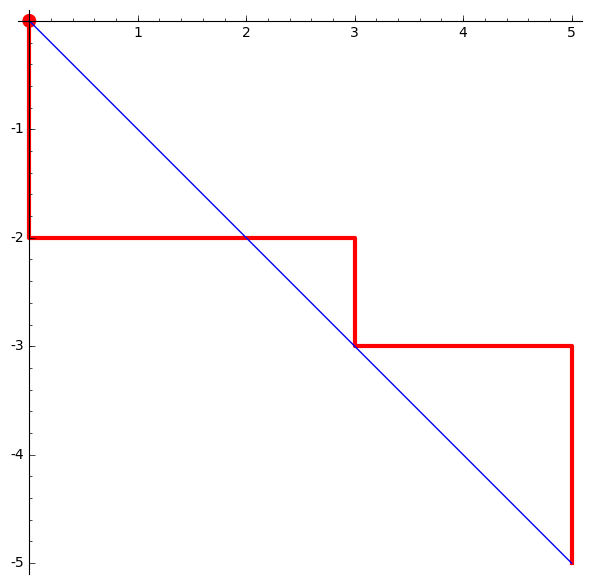

In [213]:
drawDDyck([4,4,4,3,3])

In [187]:
dickpath=DyckWord([1,1,1,0,1,0,0,1,1,0,0,0])
dickpath.pretty_print(labelling=[1,2,3,4,5,6])

       _____
      |6x x 
   ___|5x  .
 _|4x x  . .
|3x x  . . .
|2x  . . . .
|1 . . . . .



If you want gridlines or the diagonal line

In [128]:
p1=plot([-x+i for i in range(3)], (x, 0, 5), gridlines=True)

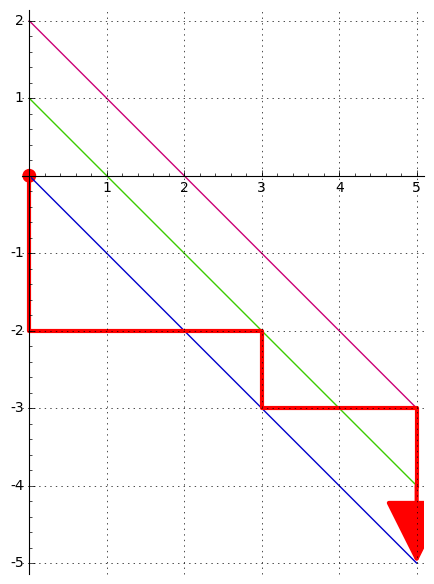

In [129]:
p1+p2

## Stuff about permutations

In [77]:
sigma=Permutation('(1,2,3,4)')
tau=Permutation('(1,2)(3)(4)')

In [78]:
sigma, tau

([2, 3, 4, 1], [2, 1, 3, 4])

To write the product $(1234) (12)$ where $\sigma=(1 2 3 4)$, $\tau=(1 2)$ we use 

In [79]:
sigma.left_action_product(tau).to_permutation_group_element()

(1,3,4)

In [80]:
tau.left_action_product(sigma).to_permutation_group_element()

(2,3,4)

In [81]:
tau.to_permutation_group_element()

(1,2)

In [82]:
tau.parent()

Standard permutations of 4

# Inversions in parking functions

Counting the number of inversions

In [88]:
PF_k(3,0)

[[1, 1, 1],
 [1, 1, 2],
 [1, 1, 3],
 [1, 2, 1],
 [1, 2, 2],
 [1, 2, 3],
 [1, 3, 1],
 [1, 3, 2],
 [2, 1, 1],
 [2, 1, 2],
 [2, 1, 3],
 [2, 2, 1],
 [2, 3, 1],
 [3, 1, 1],
 [3, 1, 2],
 [3, 2, 1]]

In [96]:
def inversions(x):
    n=len(x)
    inversion_set=[]
    for i in range(n):
        for j in range(i+1,n):
            if x[i]>x[j]:
                inversion_set.append([i+1,j+1])
    return inversion_set

In [141]:
def one_inversions(x):
    n=len(x)
    inversion_set=[]
    for i in range(n):
        for j in range(i+1,n):
            if x[i]==x[j]+1:
                inversion_set.append([i+1,j+1])
    return inversion_set

In [143]:
one_inversions([4,4,2,1])

[[3, 4]]

Note that for a parking preference $\alpha\in \text{PF}_n$ there are at most $\frac{(n)(n-1)}{2}$ inversions

In [144]:
def inversions_n_k(n):
    X=PF_k(n,0)
    k_inversion_set=[[j,0] for j in range(n*(n-1)/2 +1)]
    for i in range(len(X)):
        k=len(inversions(X[i]))
        k_inversion_set[k][1]=k_inversion_set[k][1]+1
    return k_inversion_set

In [134]:
inversions_n_k(2)

[[0, 2], [1, 1]]

In [135]:
inversions_n_k(3)

[[0, 5], [1, 5], [2, 5], [3, 1]]

In [136]:
inversions_n_k(4)

[[0, 14], [1, 21], [2, 31], [3, 30], [4, 19], [5, 9], [6, 1]]

In [137]:
inversions_n_k(5)

[[0, 42],
 [1, 84],
 [2, 154],
 [3, 210],
 [4, 245],
 [5, 217],
 [6, 175],
 [7, 105],
 [8, 49],
 [9, 14],
 [10, 1]]

In [138]:
inversions_n_k(6)

[[0, 132],
 [1, 330],
 [2, 708],
 [3, 1176],
 [4, 1722],
 [5, 2148],
 [6, 2386],
 [7, 2358],
 [8, 2080],
 [9, 1618],
 [10, 1086],
 [11, 644],
 [12, 294],
 [13, 104],
 [14, 20],
 [15, 1]]

In [139]:
inversions_n_k(7)

[[0, 429],
 [1, 1287],
 [2, 3135],
 [3, 6006],
 [4, 10164],
 [5, 15093],
 [6, 20496],
 [7, 25188],
 [8, 28770],
 [9, 30225],
 [10, 29511],
 [11, 26571],
 [12, 22161],
 [13, 16926],
 [14, 11832],
 [15, 7392],
 [16, 4089],
 [17, 1932],
 [18, 714],
 [19, 195],
 [20, 27],
 [21, 1]]

In [145]:
def one_inversions_n_k(n):
    X=PF_k(n,0)
    k_inversion_set=[[j,0] for j in range(n*(n-1)/2 +1)]
    for i in range(len(X)):
        k=len(one_inversions(X[i]))
        k_inversion_set[k][1]=k_inversion_set[k][1]+1
    return k_inversion_set

In [154]:
one_inversions_n_k(2)

[[0, 2], [1, 1]]

In [152]:
total_one_inversions(2)

3

In [147]:
one_inversions_n_k(3)

[[0, 7], [1, 6], [2, 3], [3, 0]]

In [148]:
one_inversions_n_k(4)

[[0, 36], [1, 40], [2, 39], [3, 8], [4, 2], [5, 0], [6, 0]]

In [151]:
def total_one_inversions(n):
    sum_one_inversions=0
    for i in range(len(one_inversions_n_k(n))):
        sum_one_inversions=sum_one_inversions+one_inversions_n_k(n)[i][1]
    return sum_one_inversions

# Counting the number of weakly decreasing elements of $PF_{n,k}$

count number of decreasing parking preferences

In [90]:
[len(decreasing_parking_pref(n)) for  n in range(1,7)]

[1, 3, 10, 35, 126, 462]

Return a list of the elements of $PF_{n,k}$ that are weakly decreasing

In [91]:
def decreasingPF_k(n,k):
    X=decreasing_parking_pref(n)
    lst=[]
    for x in X:
        if is_PF_k(x,k):
            lst.append(x)
    return lst

Parking Functions

$|DPF_n|=Cat(n)$

In [92]:
[len(decreasingPF_k(n,0)) for n in range(1,8)]

KeyboardInterrupt: 

Naples Parking Functions **NEEDS PROOF**

$|DNPF_n|=\frac{3(2n)!}{(n+2)!(n-1)!}$

In [ ]:
[len(decreasingPF_k(n,1)) for n in range(2,8)]

Backing up 2 spots **NEEDS PROOF**

$|DPF_{n,2}|=\binom{2n}{n}-\binom{2n-1}{n+3}$

In [72]:
[len(decreasingPF_k(n,2)) for n in range(2,8)]

[3, 10, 34, 117, 407, 1430]

Backing up 3 spots **NEEDS PROOF**

$|DPF_{n,3}|$

http://oeis.org/A026026

In [78]:
[len(decreasingPF_k(n,3)) for n in range(3,8)]

[10, 35, 125, 451, 1638]

$|DPF_{n,n-2}|$

In [75]:
[len(decreasingPF_k(n,n-2)) for n in range(2,8)]

[2, 9, 34, 125, 461, 1715]

$|DPF_{n,n-1}|=|DPP_n|$

In [76]:
[len(decreasingPF_k(n,n-1)) for n in range(3,8)]

[10, 35, 126, 462, 1716]

## Which Naples have all rearrangements 

In [225]:
lst=[]
for X in decreasingPF_k(6,1):
    count=0
    for y in Arrangements(X,6):
        if is_NPF(y)==False:
            count=count+1
    if count==0:
        lst.append(X)  

In [226]:
bigOlList=list(Set(lst).difference(Set(decreasingPF_k(6,0))))

In [227]:
bigOlList

[[6, 6, 1, 1, 1, 1],
 [6, 6, 2, 1, 1, 1],
 [6, 6, 3, 1, 1, 1],
 [6, 6, 4, 1, 1, 1],
 [5, 5, 5, 1, 1, 1],
 [6, 5, 5, 1, 1, 1],
 [6, 6, 2, 2, 1, 1],
 [6, 6, 3, 2, 1, 1],
 [6, 6, 4, 2, 1, 1],
 [5, 5, 5, 2, 1, 1],
 [6, 5, 5, 2, 1, 1],
 [6, 6, 3, 3, 1, 1],
 [6, 6, 4, 3, 1, 1],
 [5, 5, 5, 3, 1, 1],
 [6, 5, 5, 3, 1, 1],
 [4, 4, 4, 4, 1, 1],
 [5, 4, 4, 4, 1, 1],
 [6, 4, 4, 4, 1, 1],
 [5, 5, 4, 4, 1, 1],
 [6, 5, 4, 4, 1, 1],
 [6, 6, 4, 4, 1, 1],
 [6, 6, 2, 2, 2, 1],
 [6, 6, 3, 2, 2, 1],
 [6, 6, 4, 2, 2, 1],
 [5, 5, 5, 2, 2, 1],
 [6, 5, 5, 2, 2, 1],
 [6, 6, 3, 3, 2, 1],
 [6, 6, 4, 3, 2, 1],
 [5, 5, 5, 3, 2, 1],
 [6, 5, 5, 3, 2, 1],
 [4, 4, 4, 4, 2, 1],
 [5, 4, 4, 4, 2, 1],
 [6, 4, 4, 4, 2, 1],
 [5, 5, 4, 4, 2, 1],
 [6, 5, 4, 4, 2, 1],
 [6, 6, 4, 4, 2, 1],
 [3, 3, 3, 3, 3, 1],
 [4, 3, 3, 3, 3, 1],
 [5, 3, 3, 3, 3, 1],
 [6, 3, 3, 3, 3, 1],
 [4, 4, 3, 3, 3, 1],
 [5, 4, 3, 3, 3, 1],
 [6, 4, 3, 3, 3, 1],
 [5, 5, 3, 3, 3, 1],
 [6, 5, 3, 3, 3, 1],
 [6, 6, 3, 3, 3, 1],
 [4, 4, 4, 3, 3, 1],
 [5, 4, 4, 3,

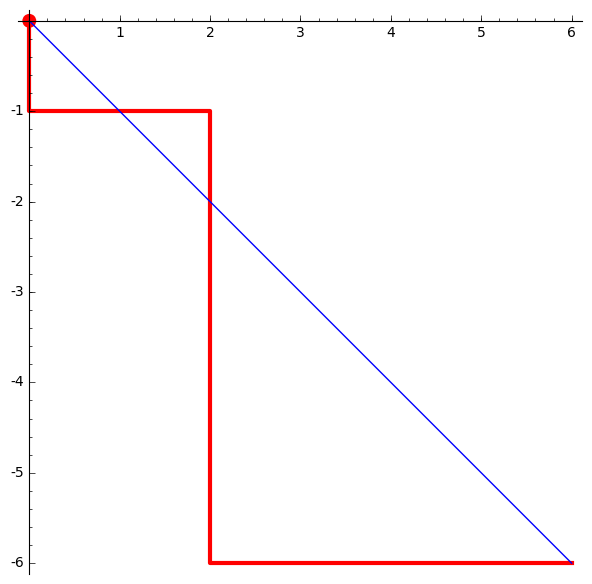

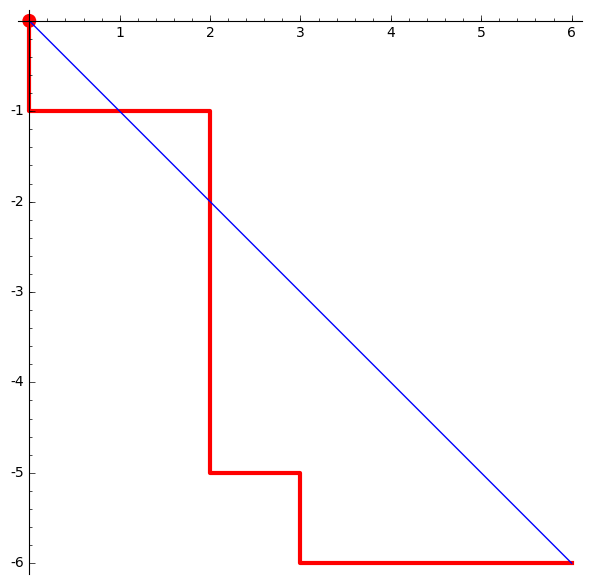

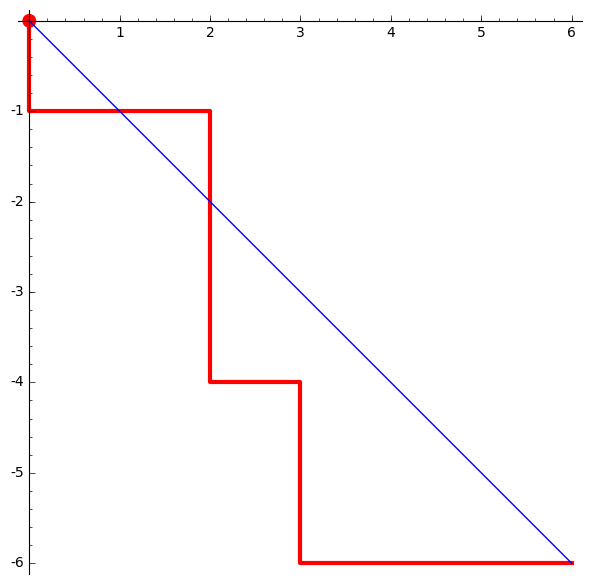

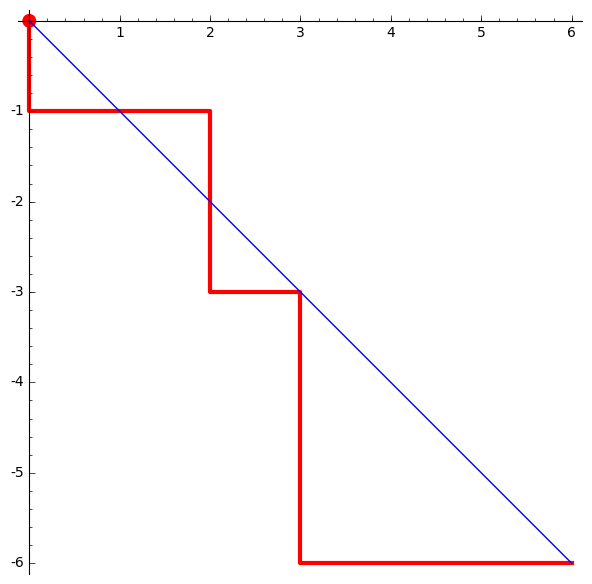

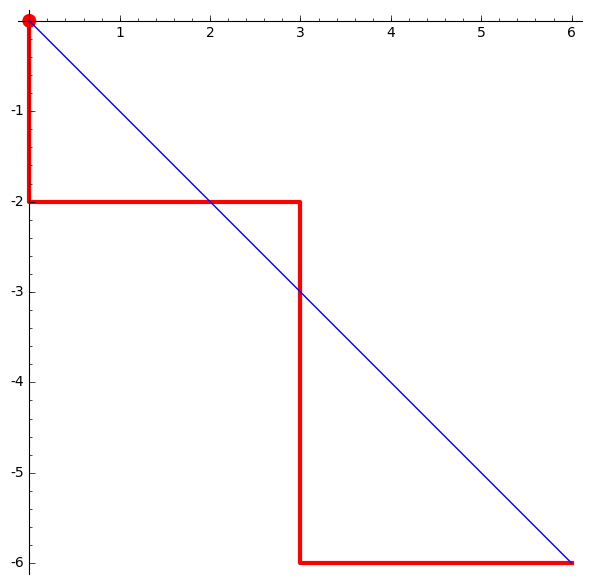

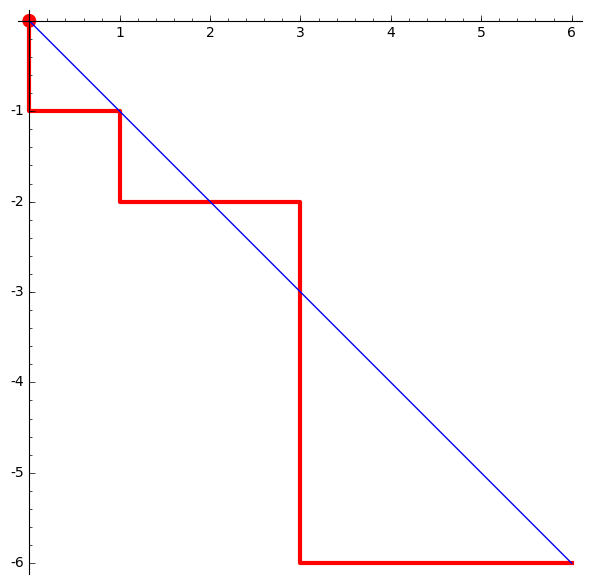

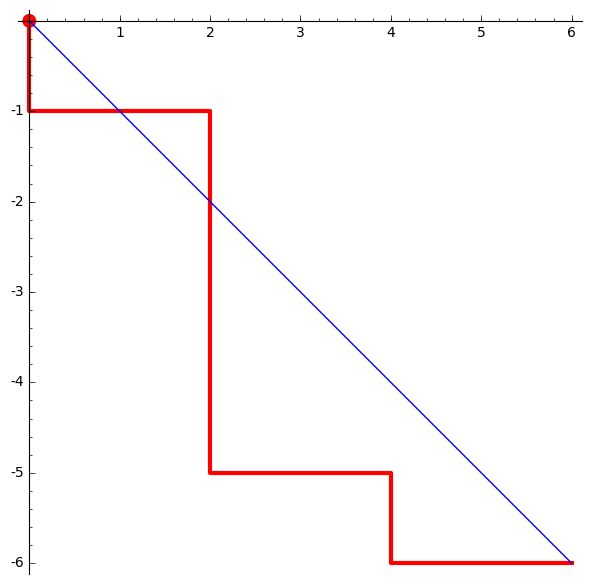

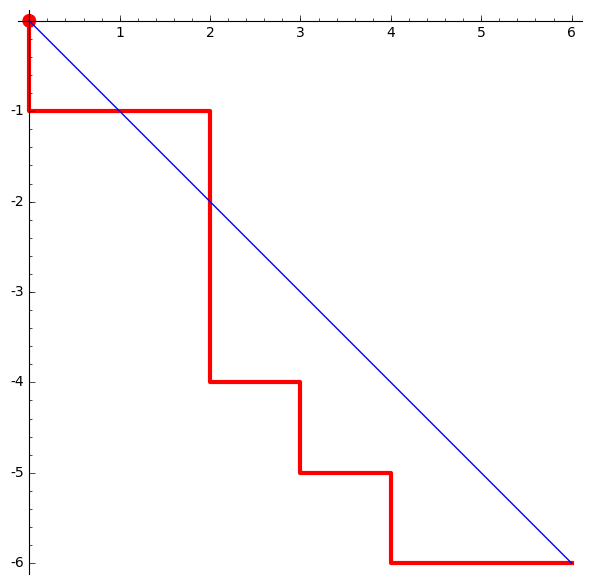

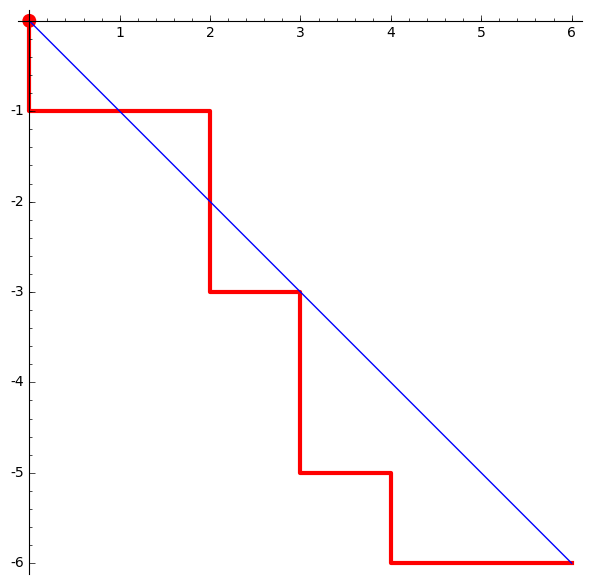

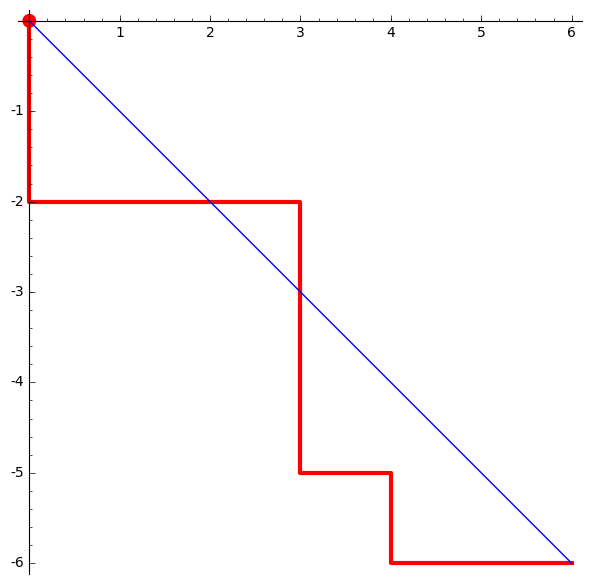

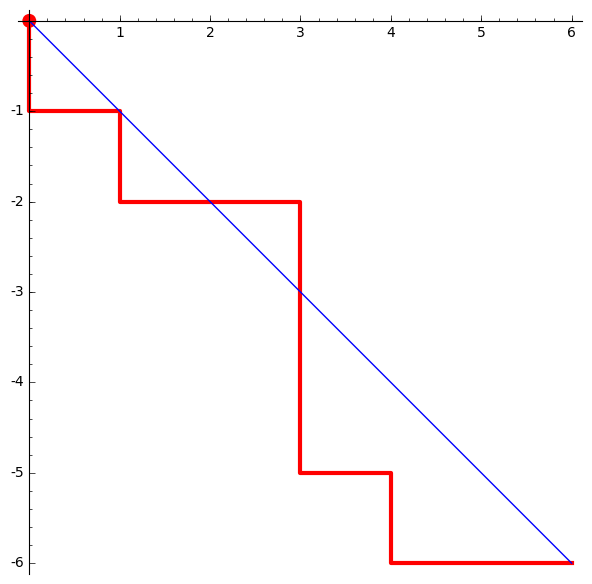

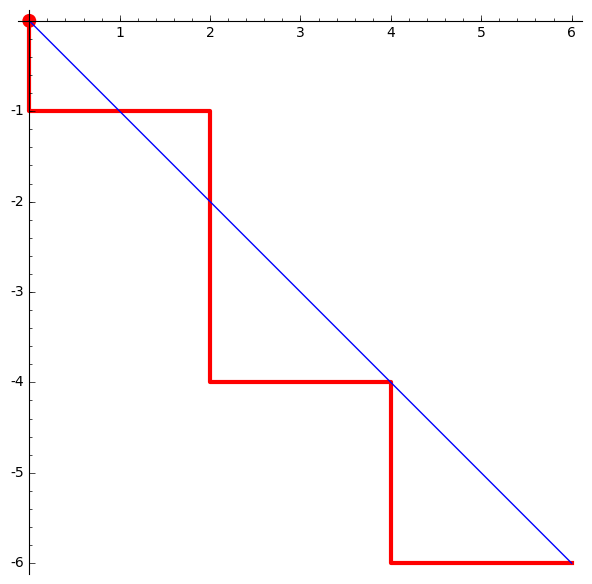

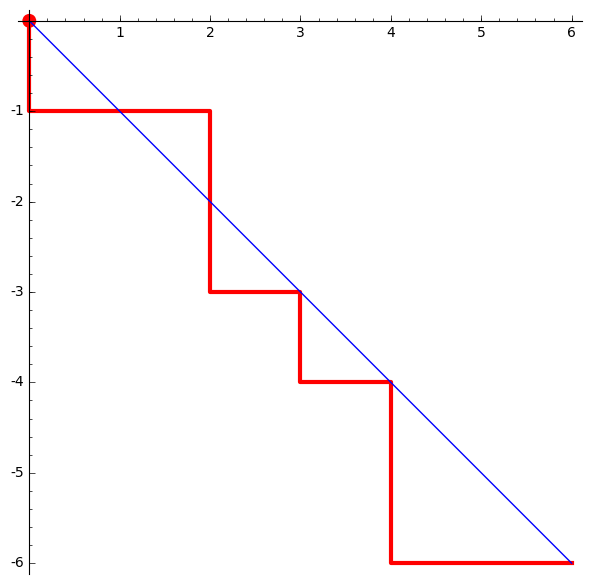

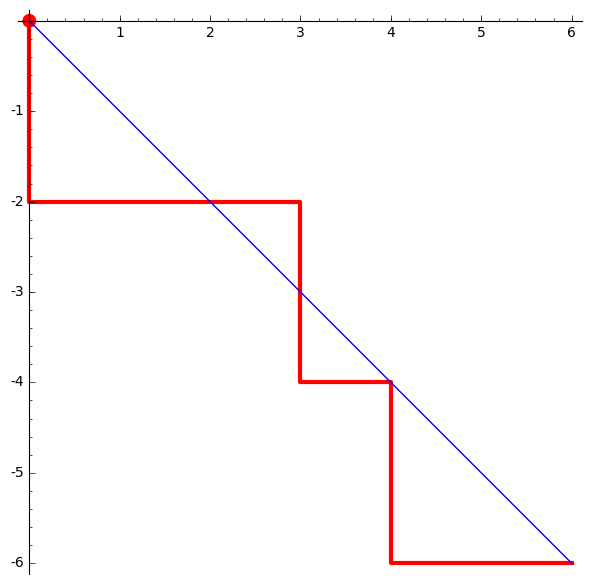

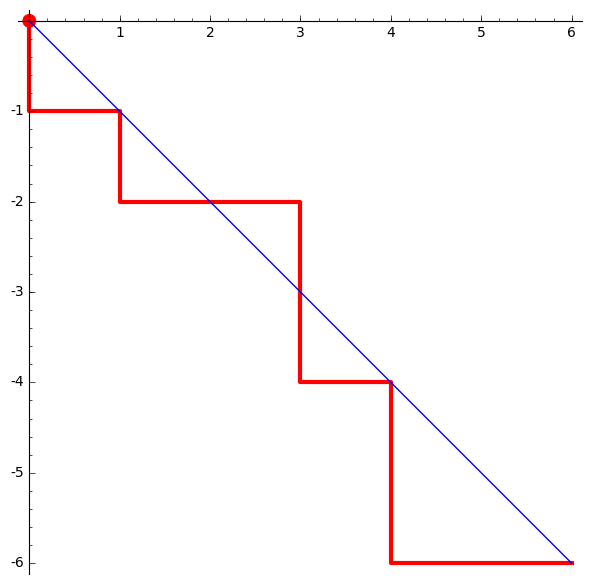

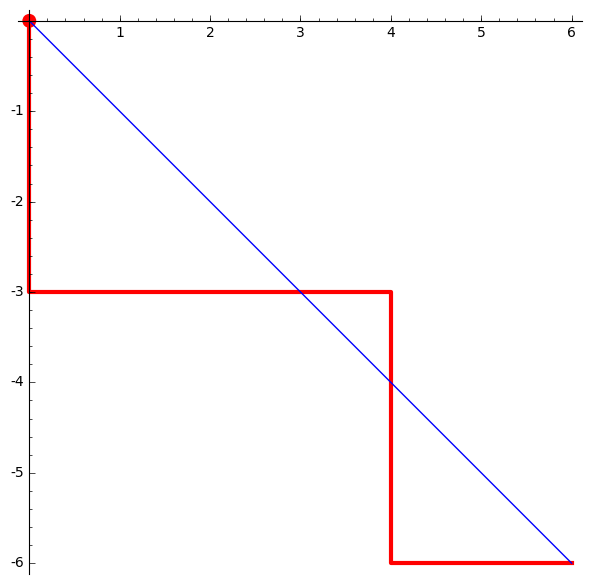

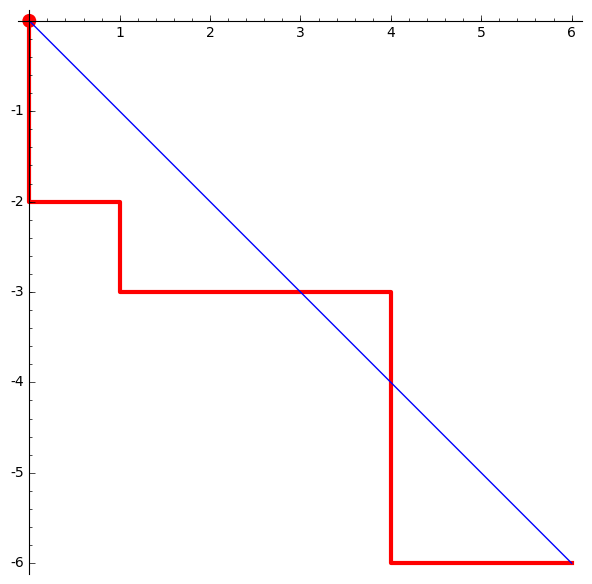

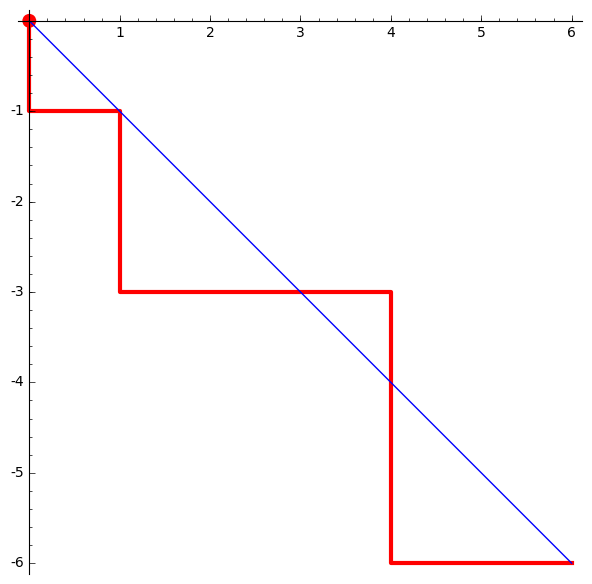

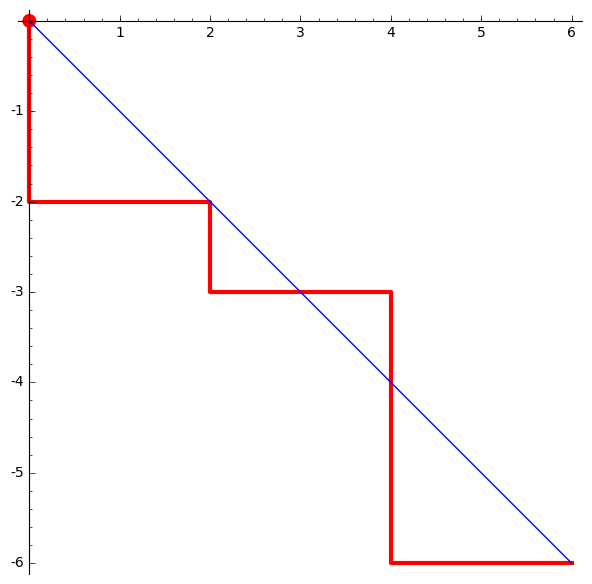

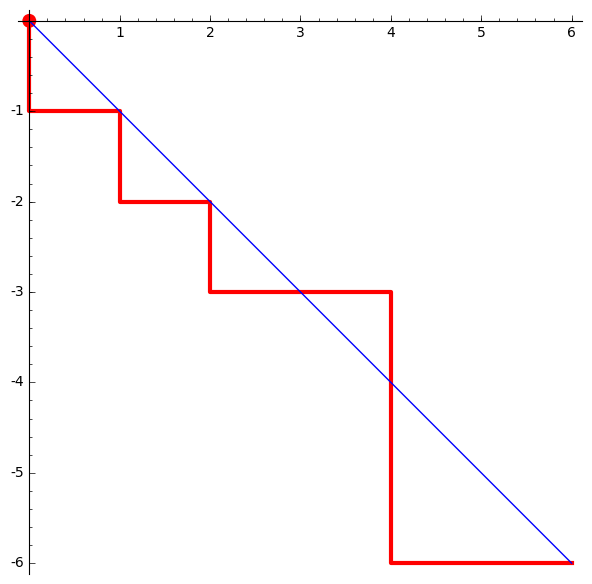

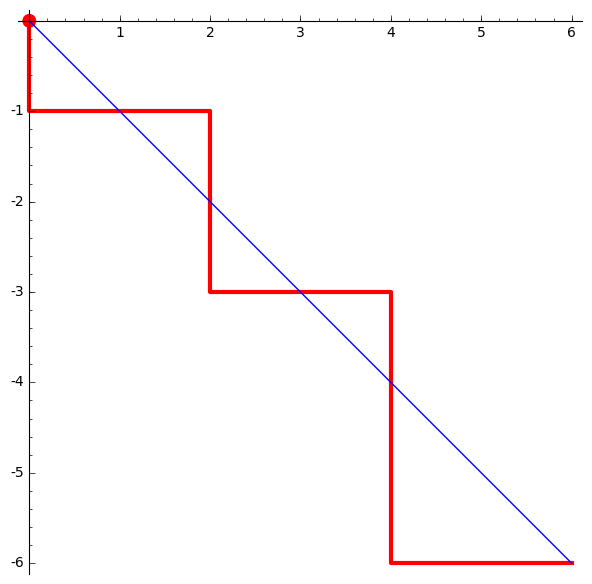

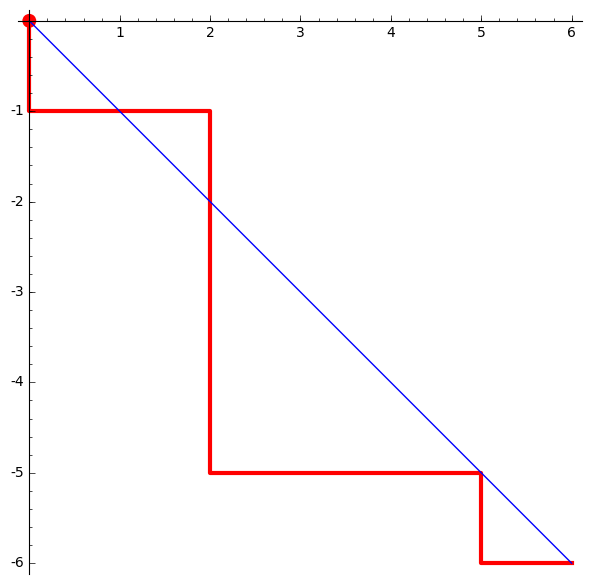

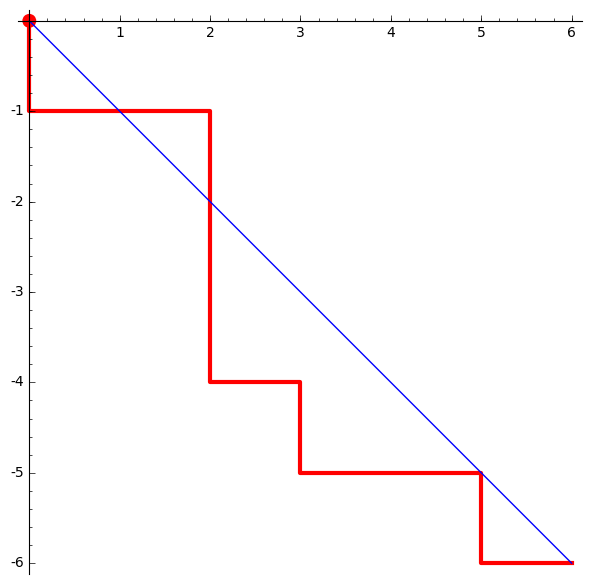

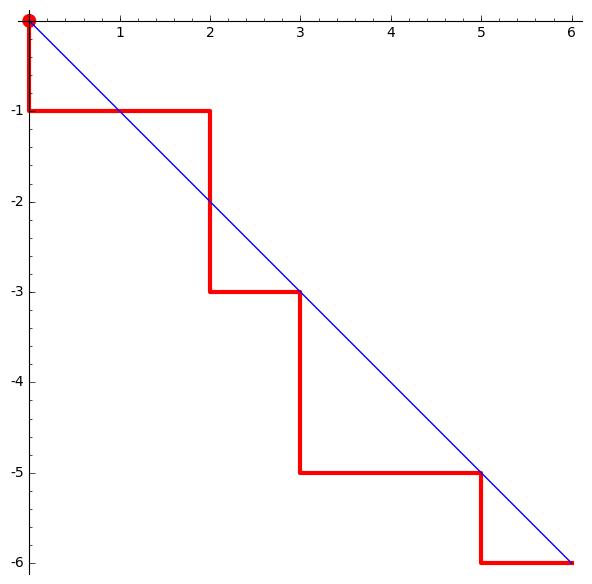

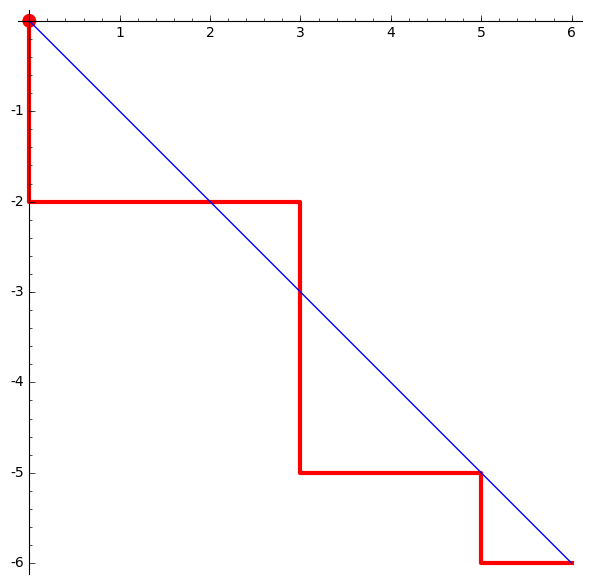

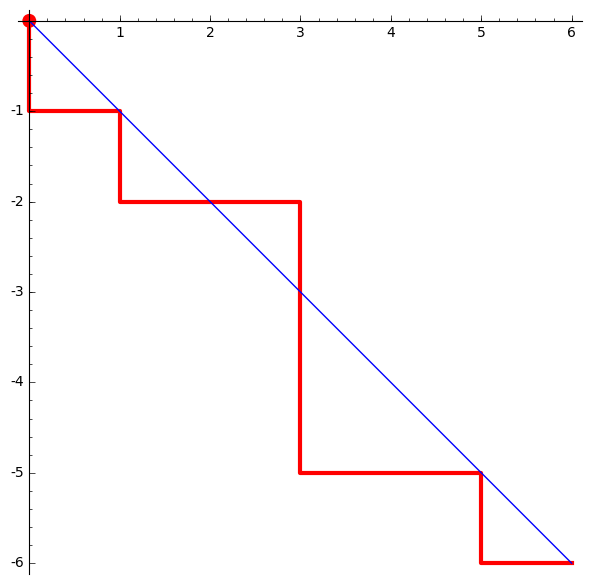

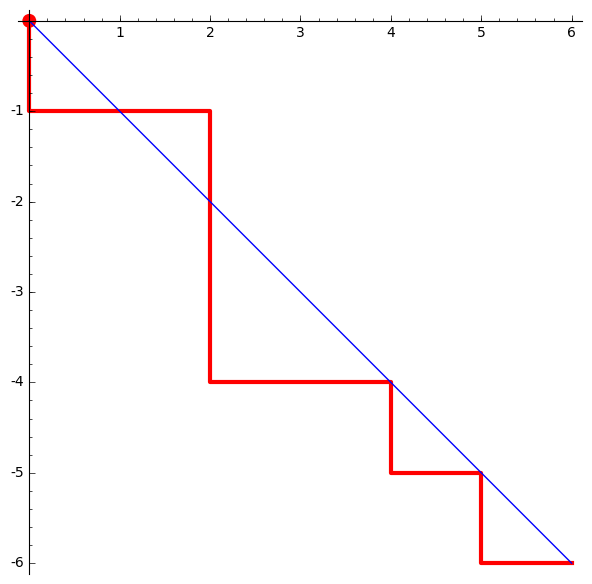

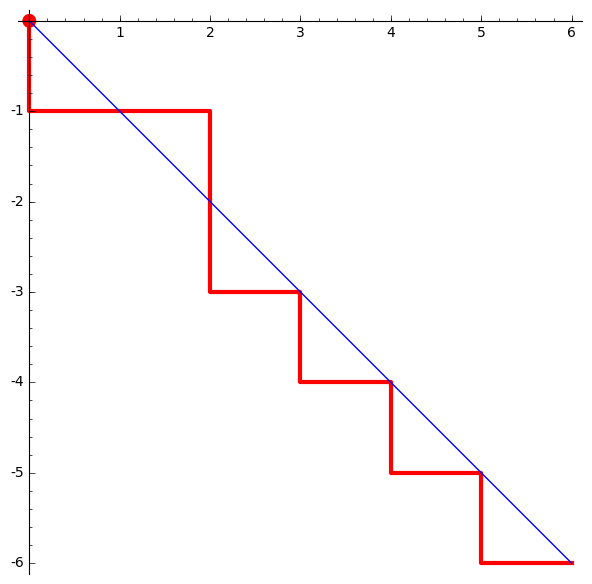

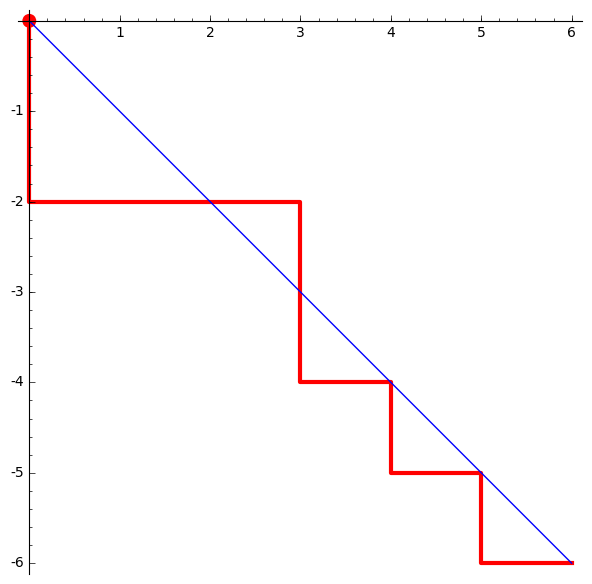

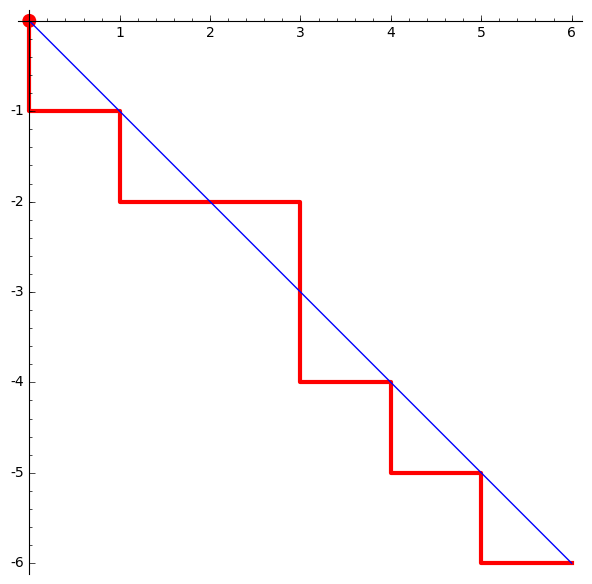

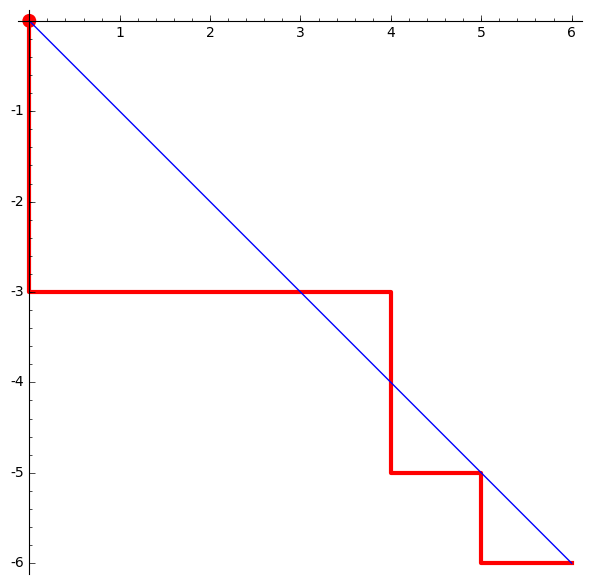

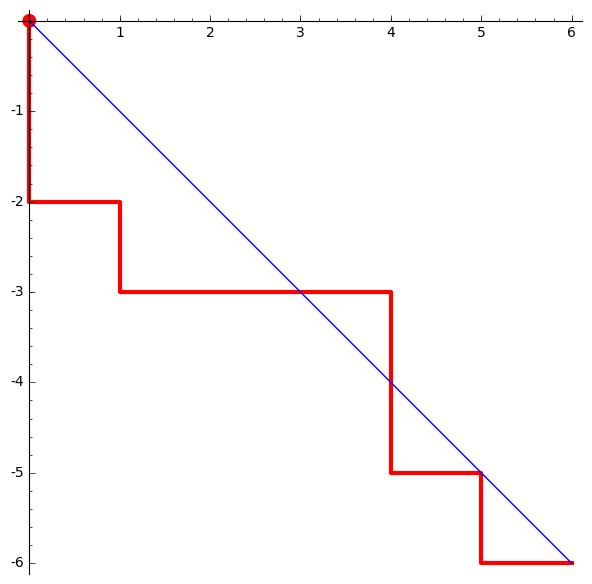

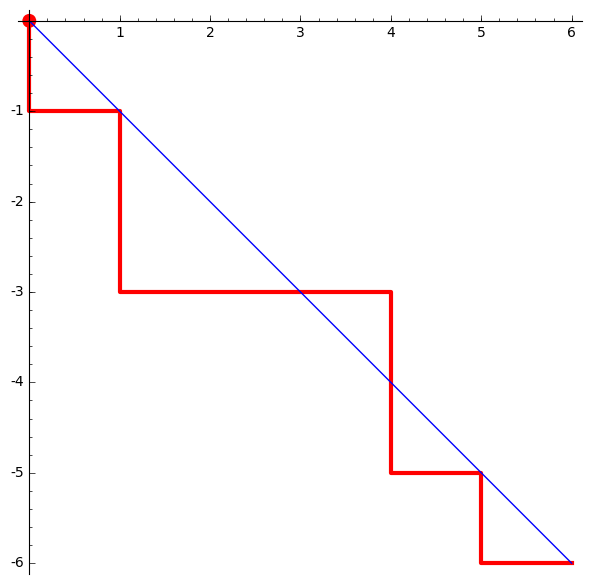

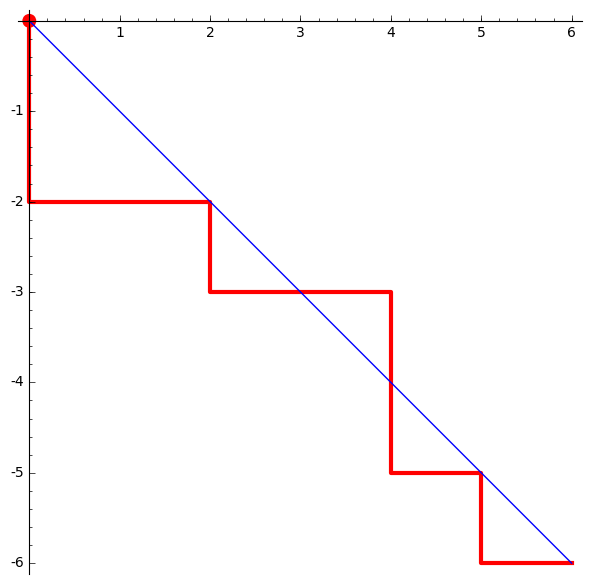

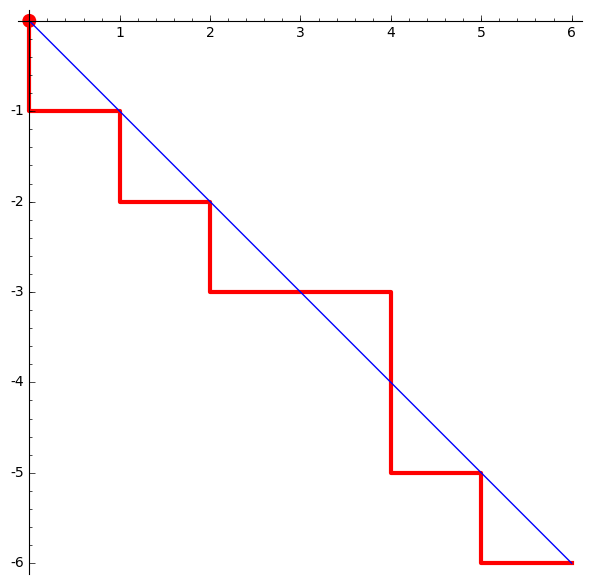

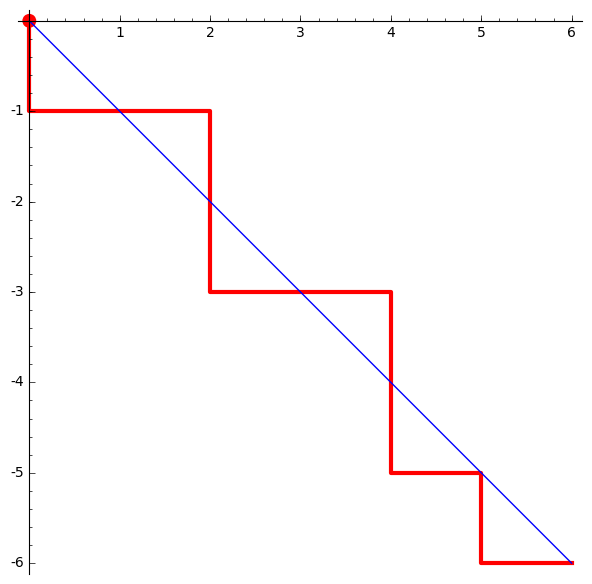

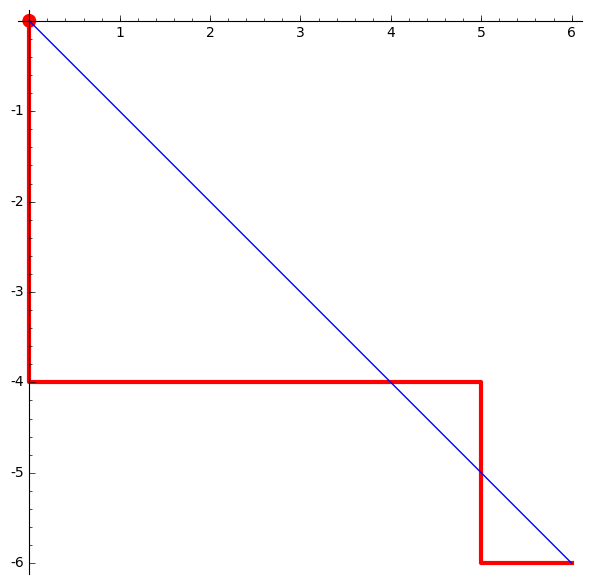

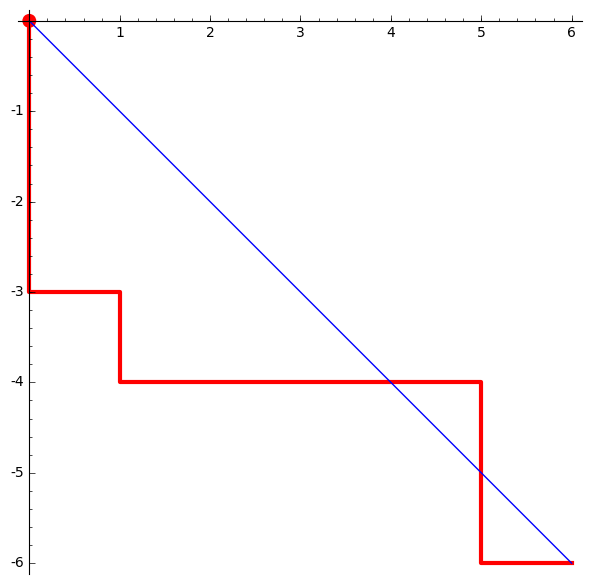

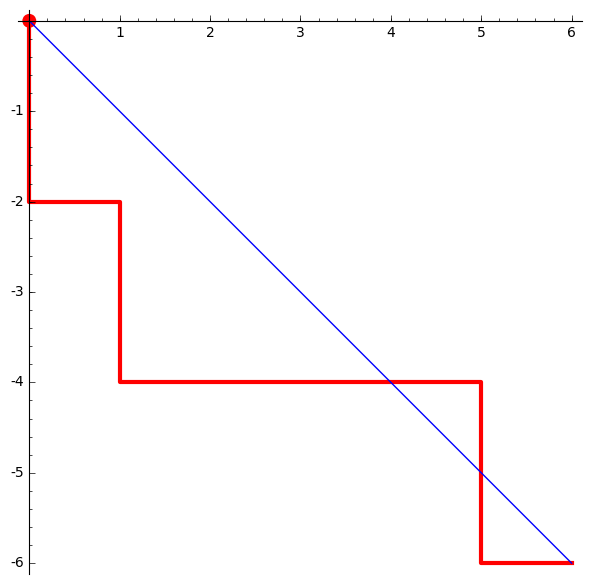

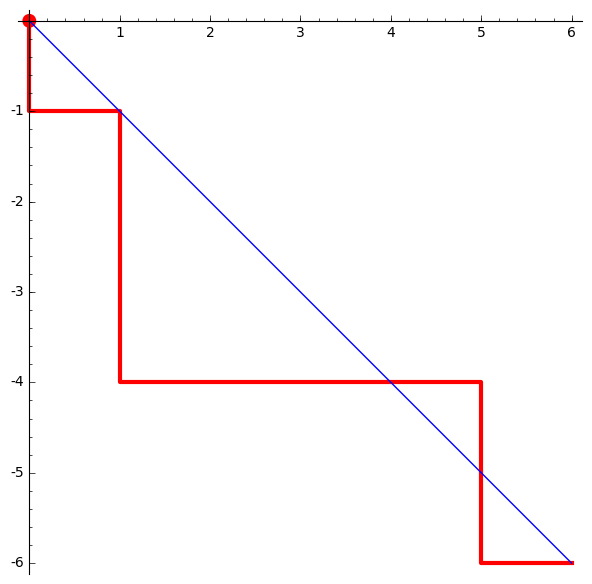

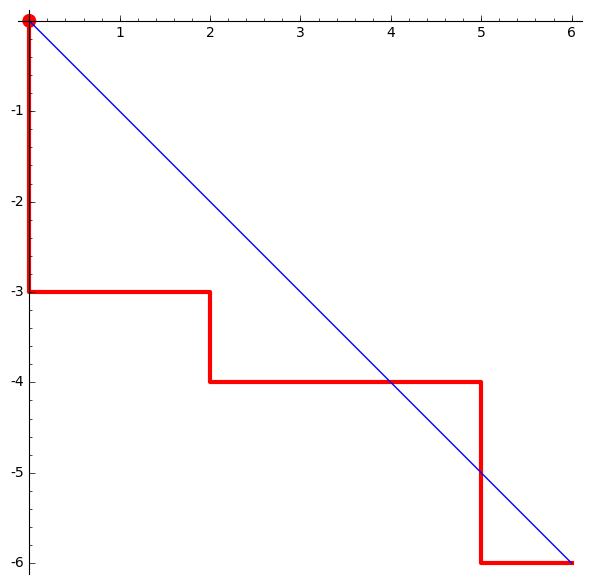

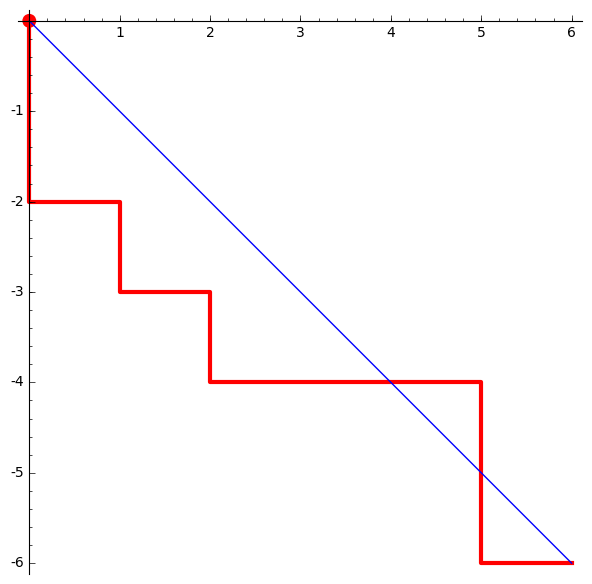

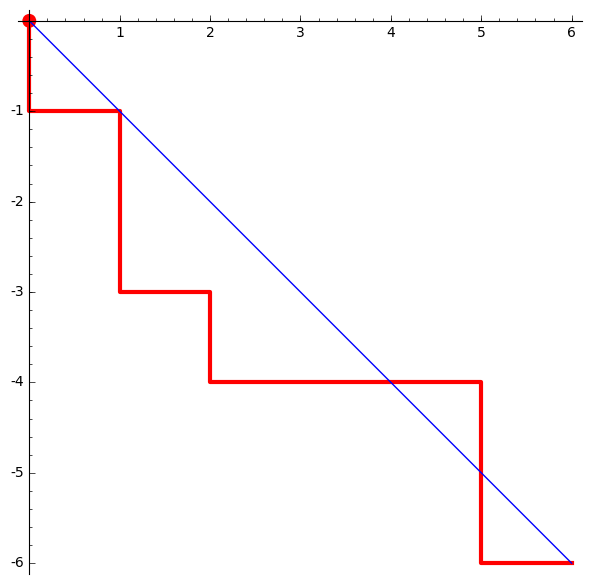

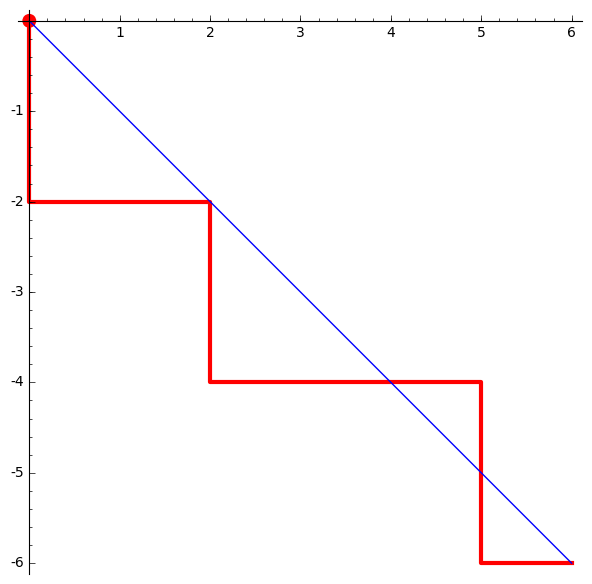

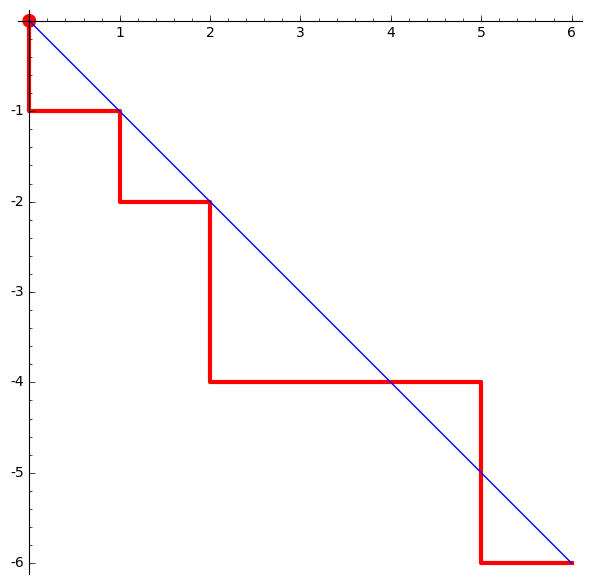

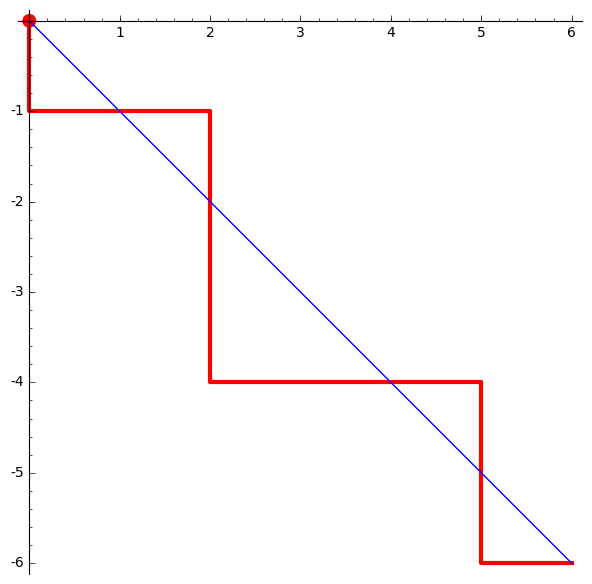

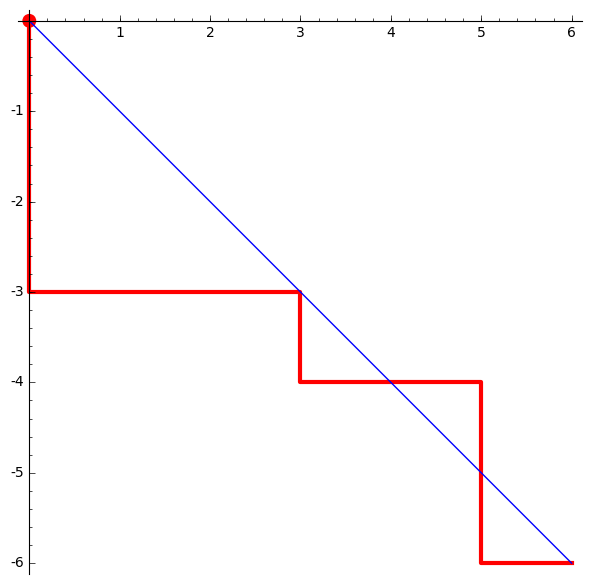

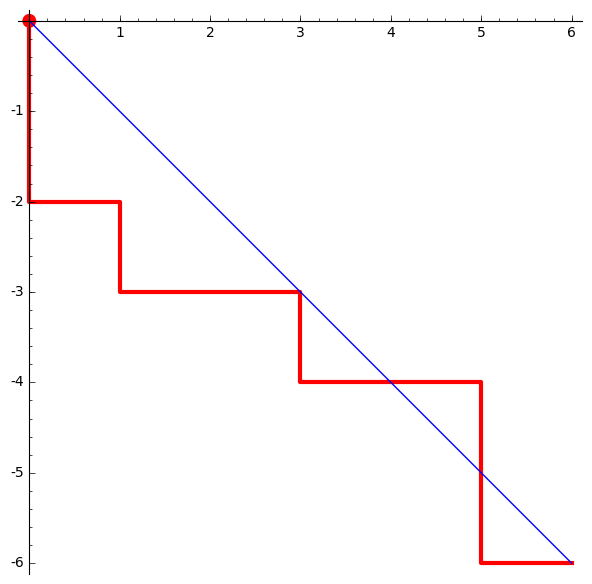

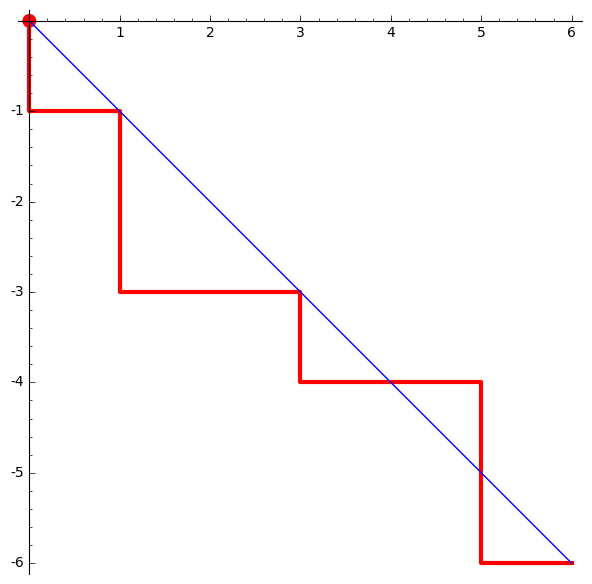

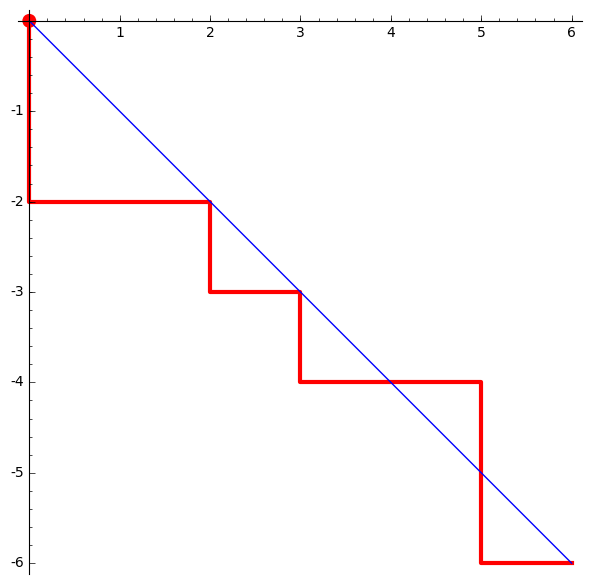

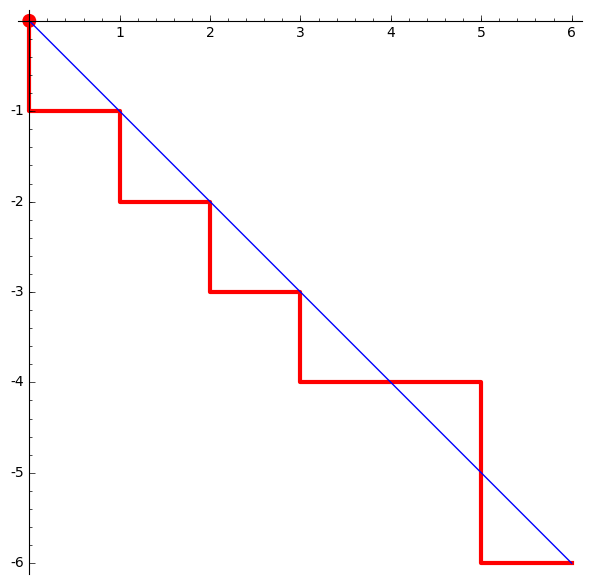

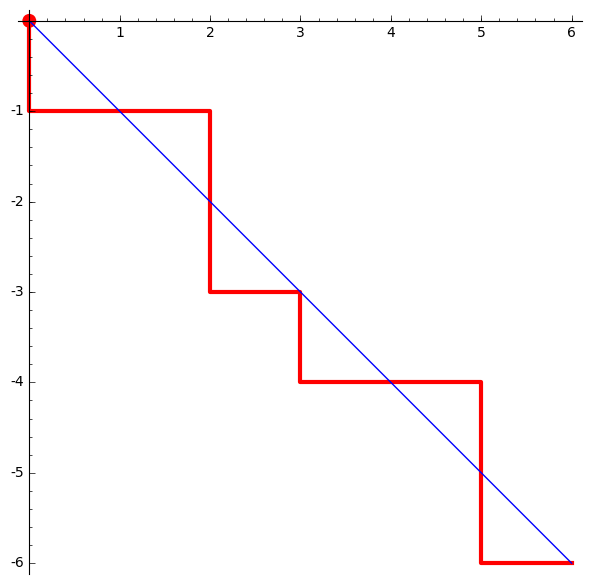

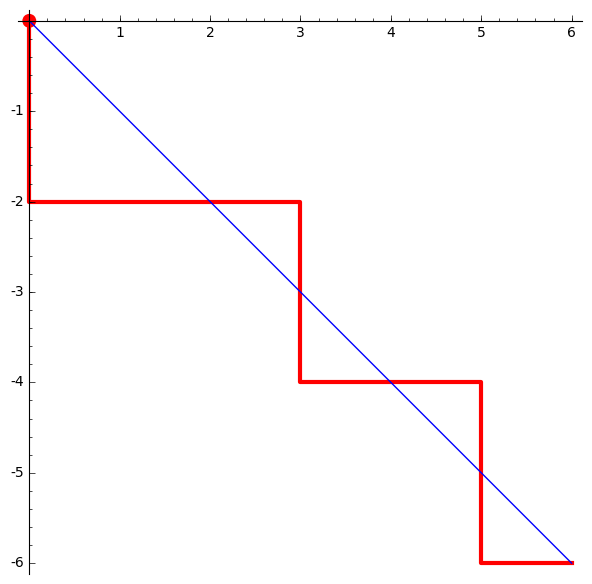

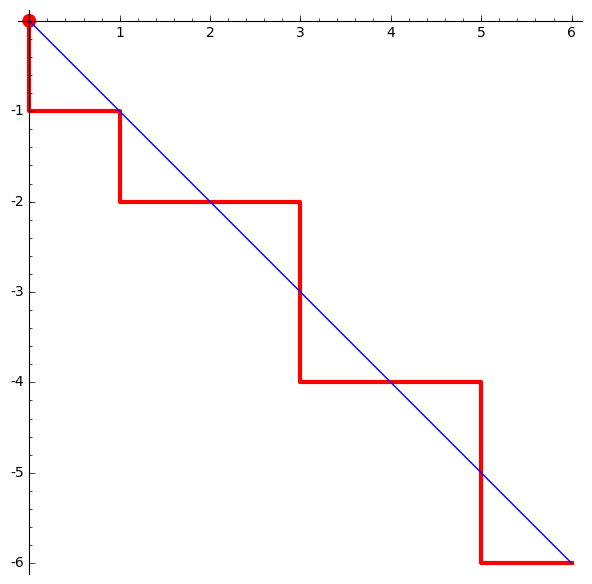

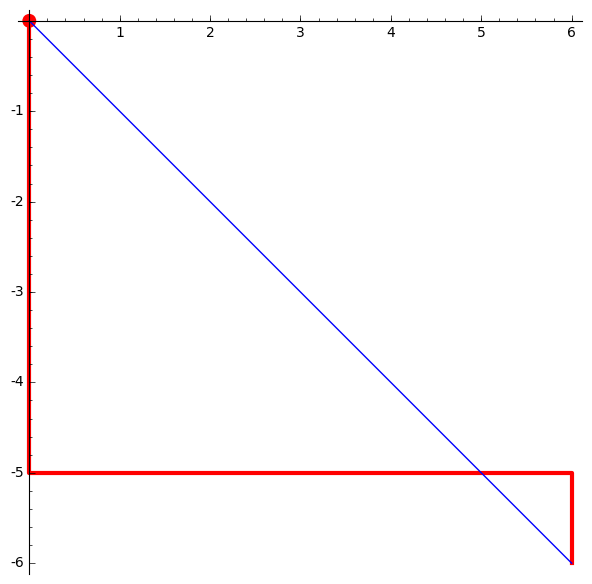

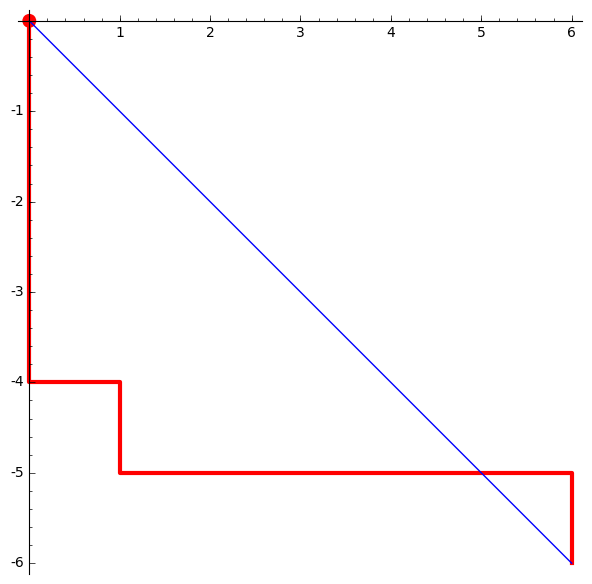

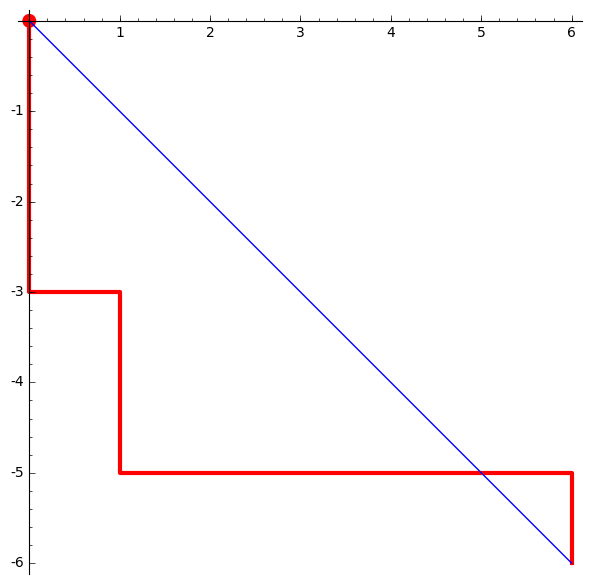

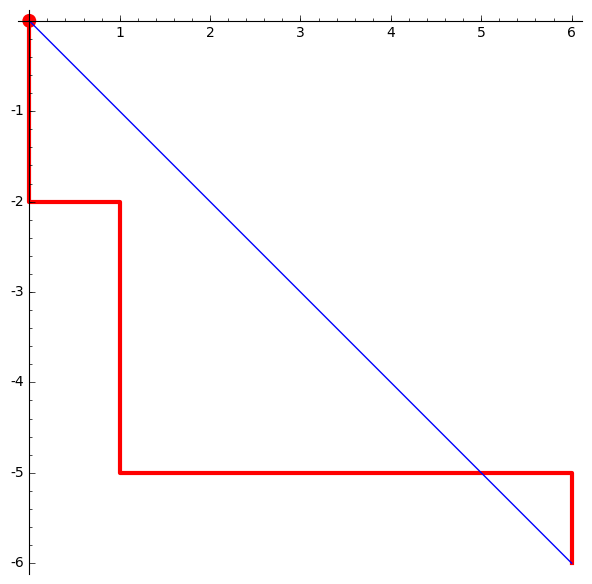

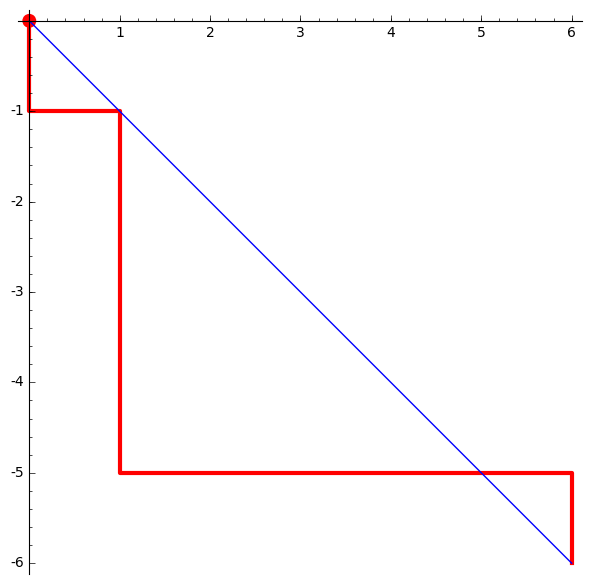

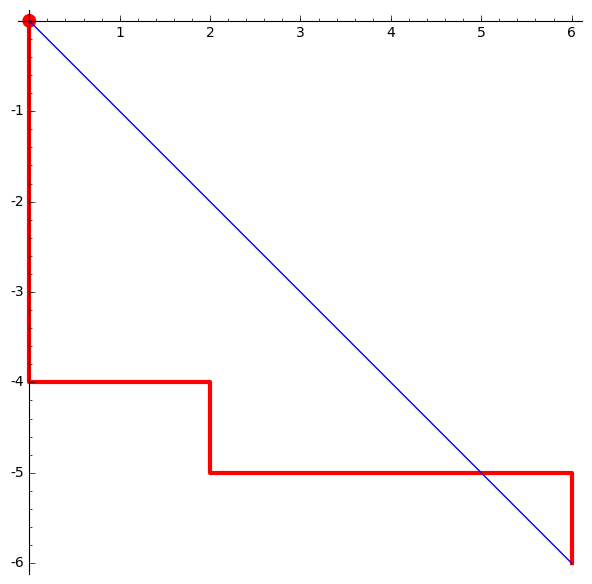

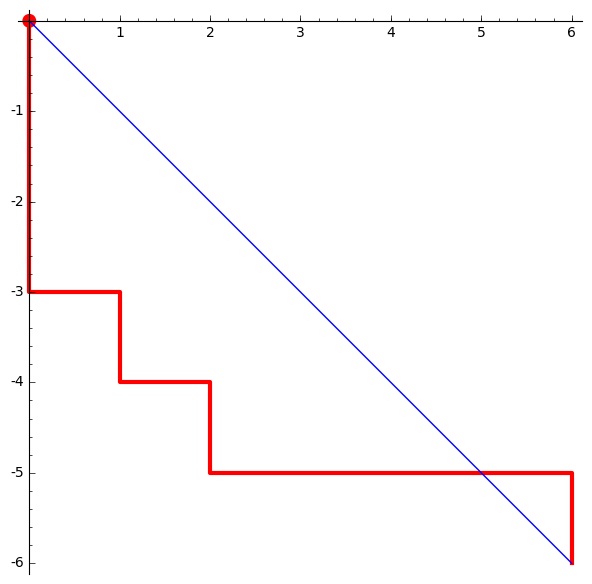

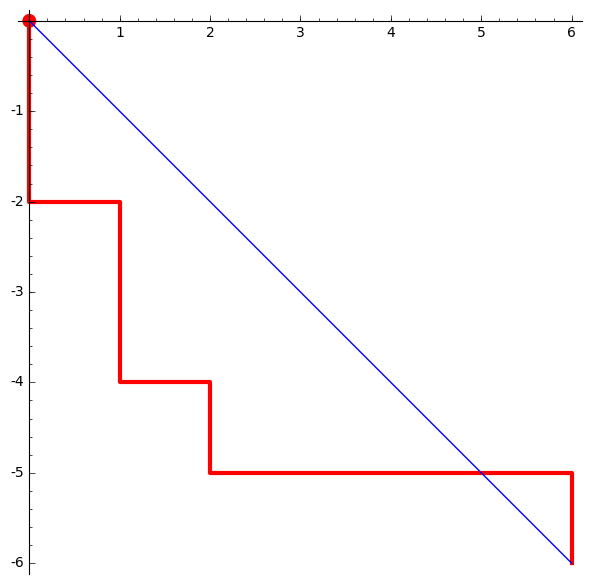

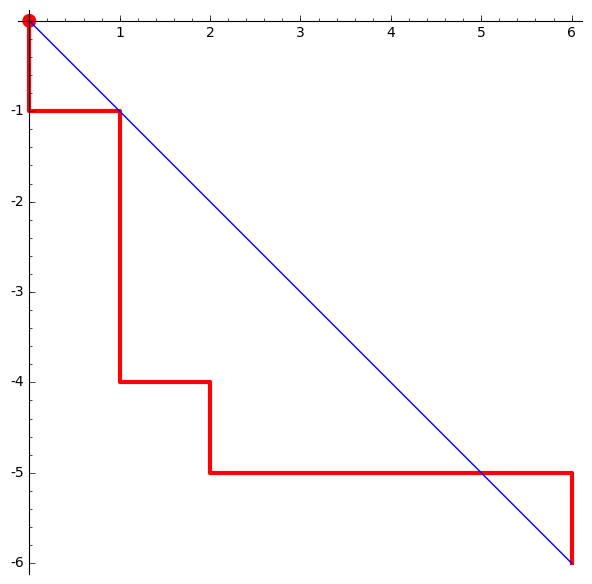

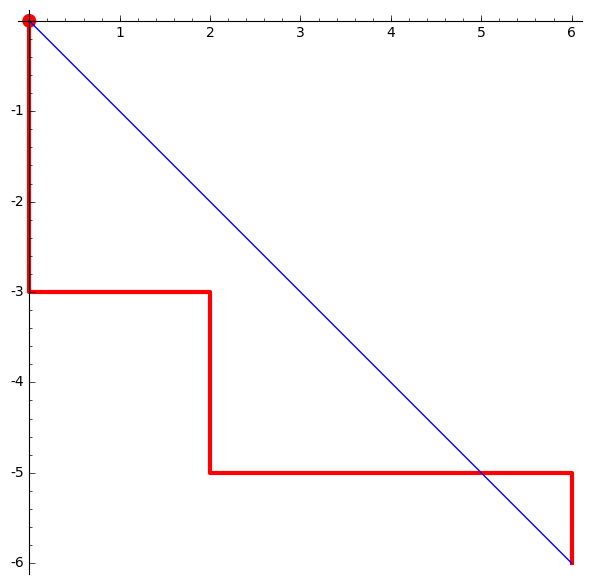

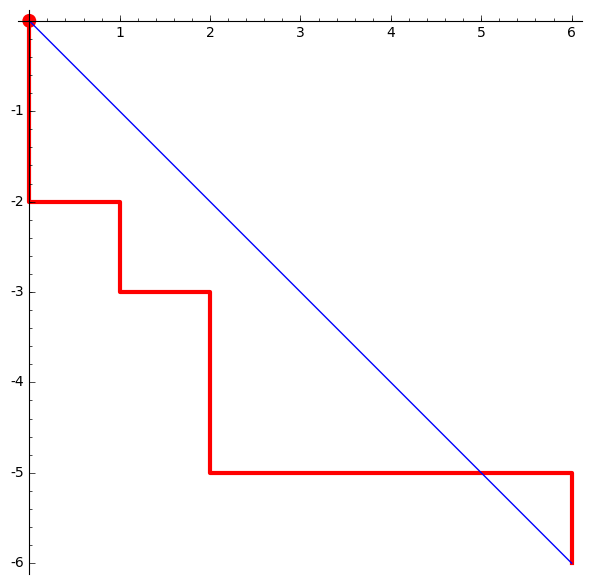

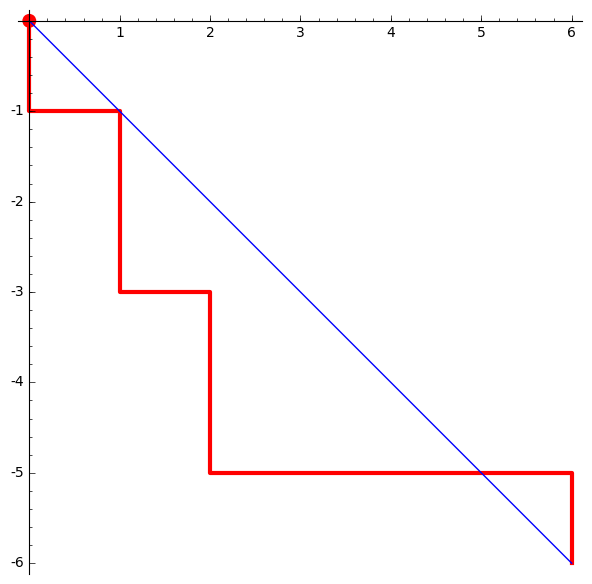

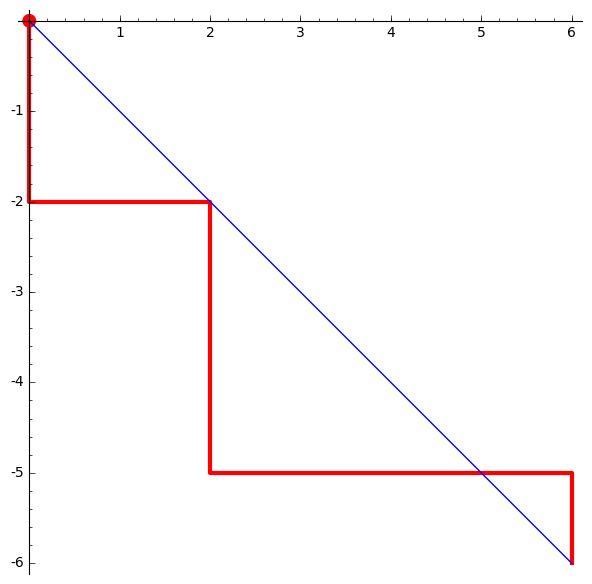

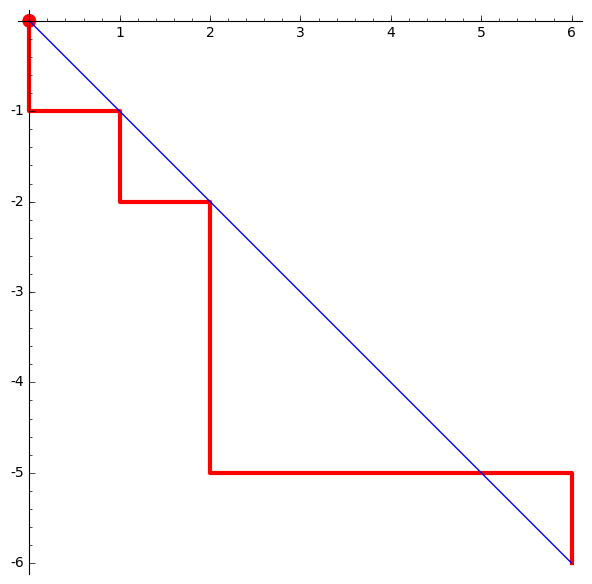

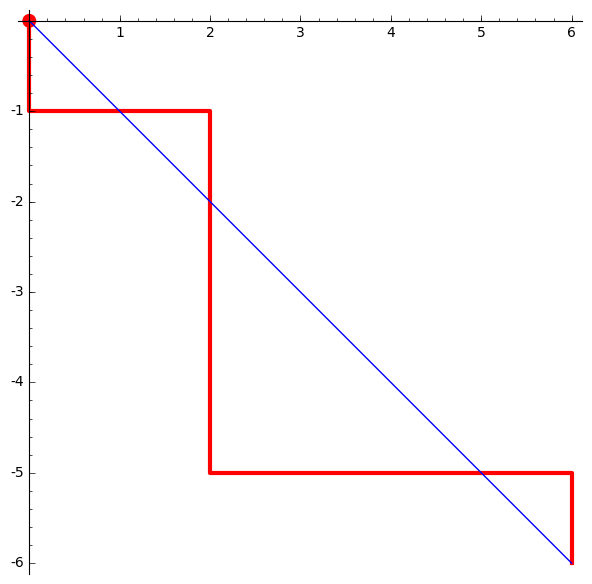

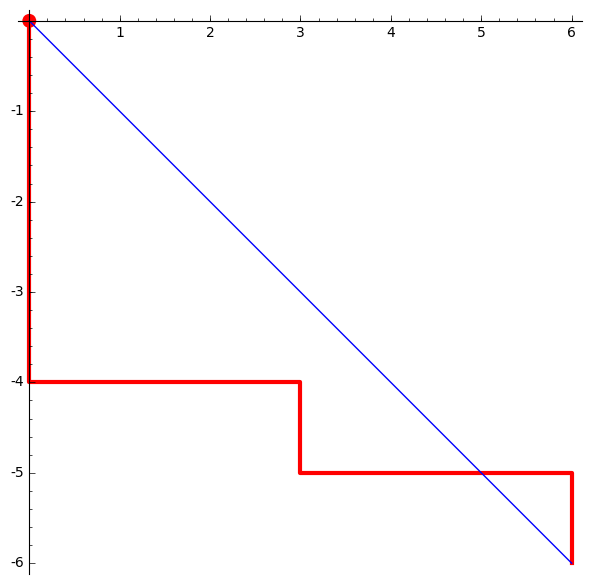

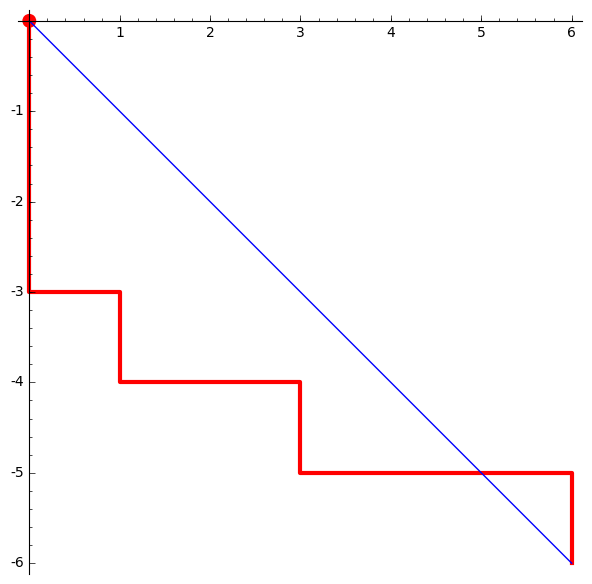

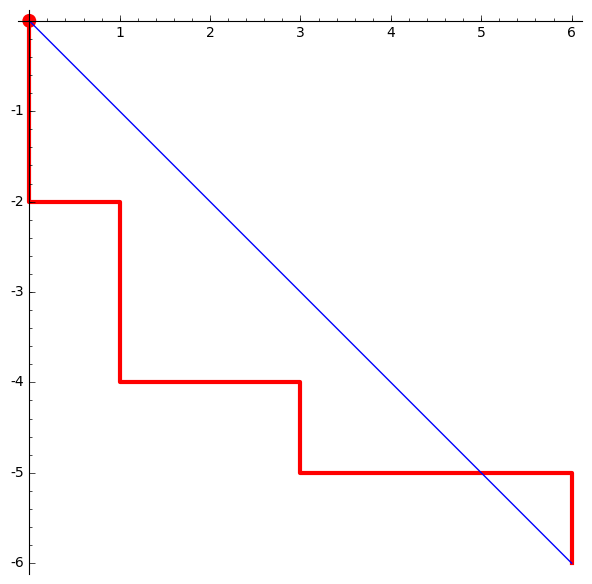

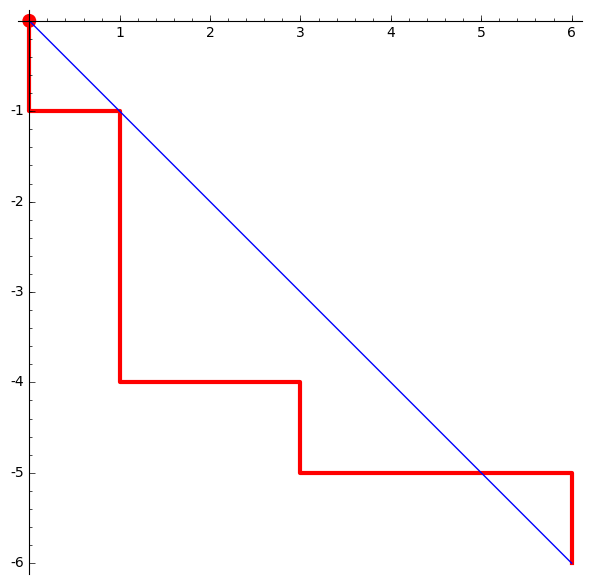

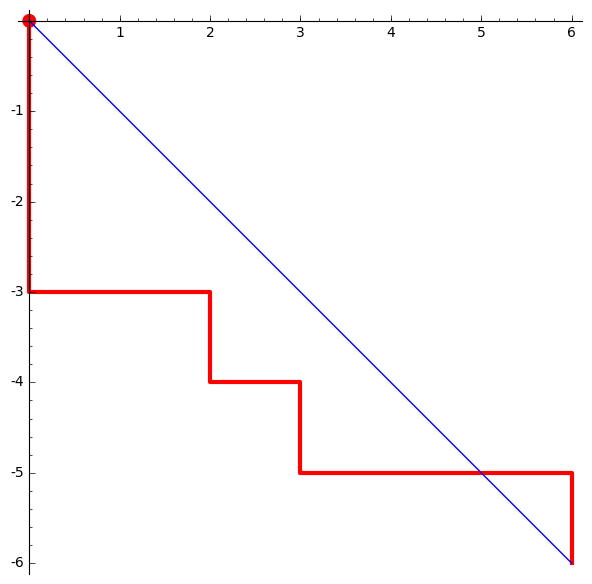

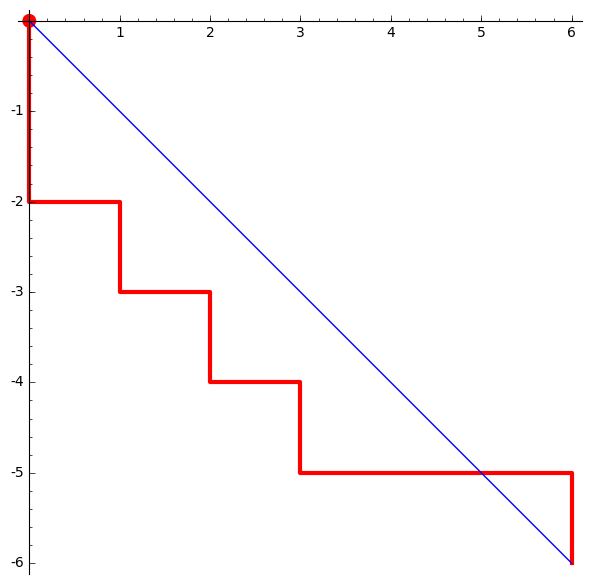

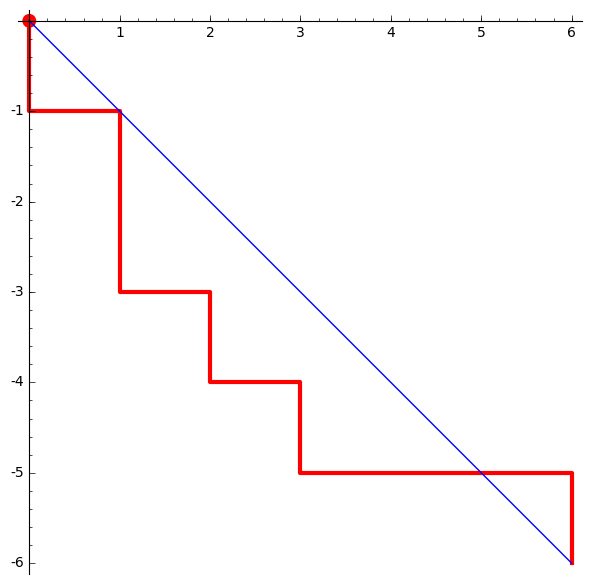

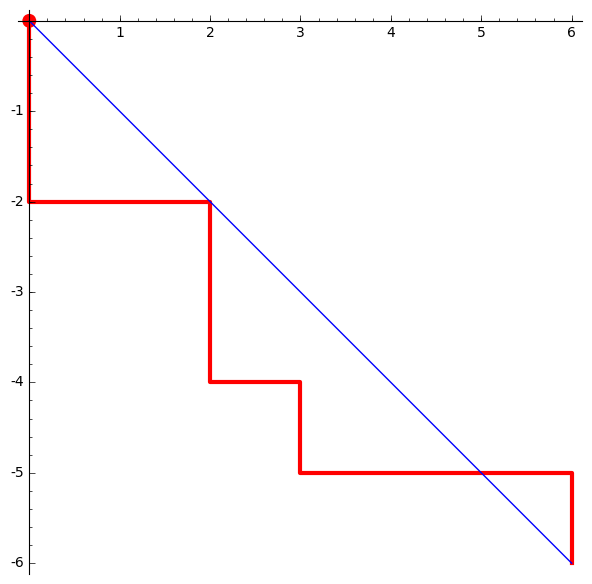

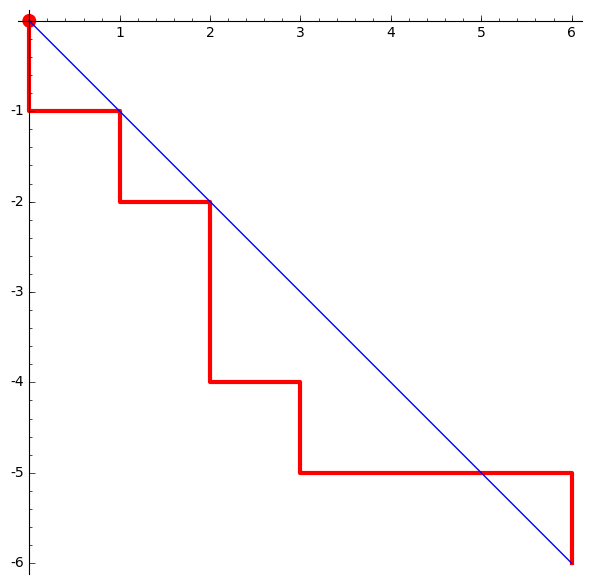

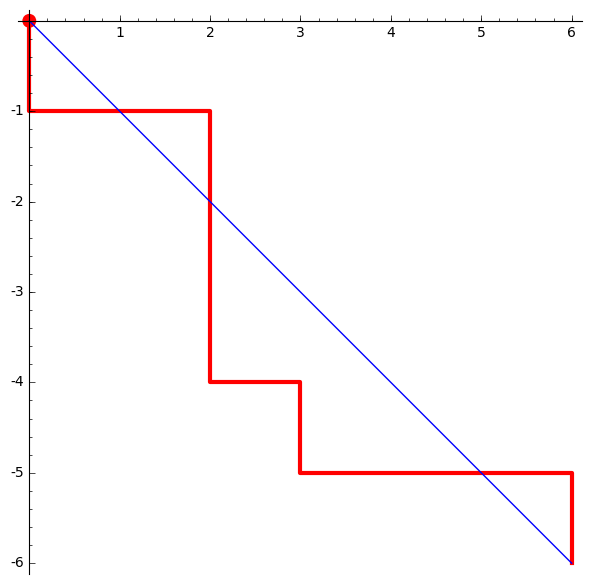

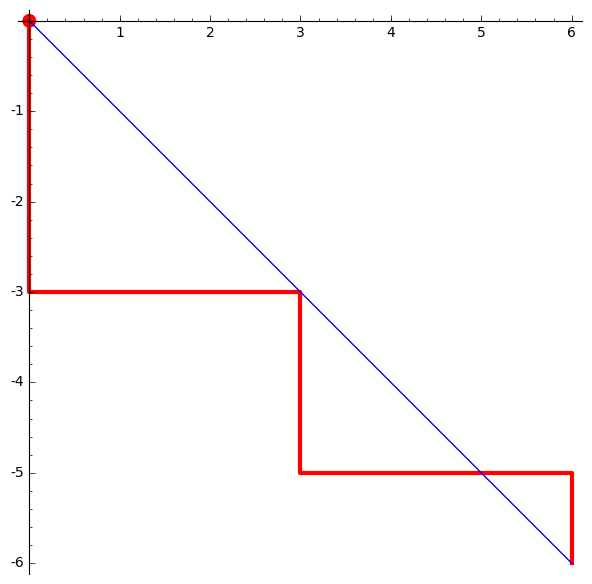

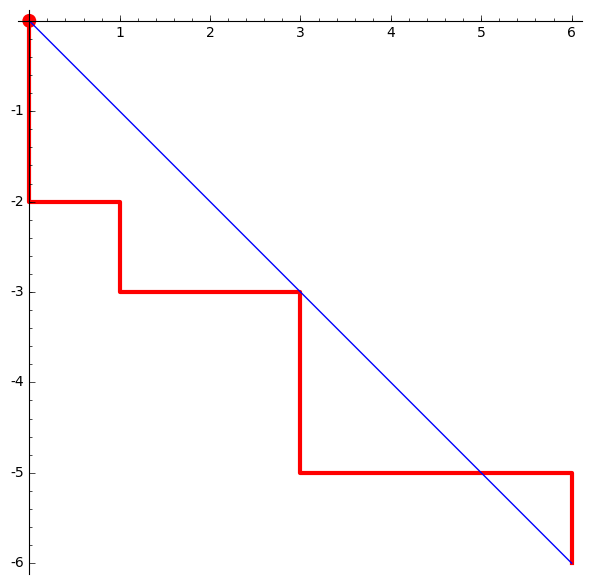

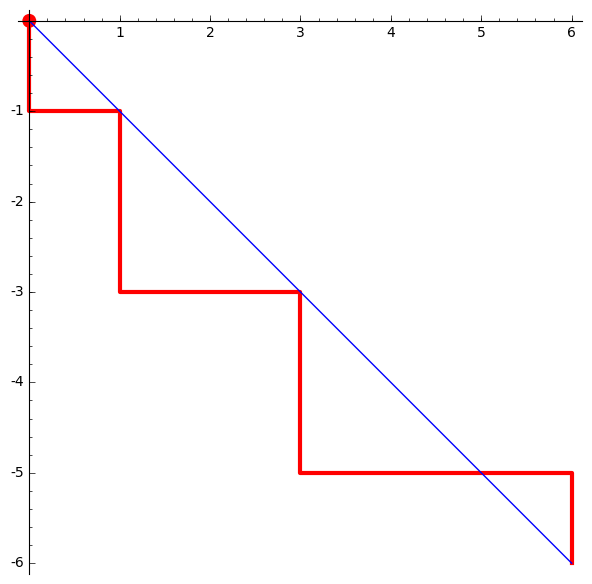

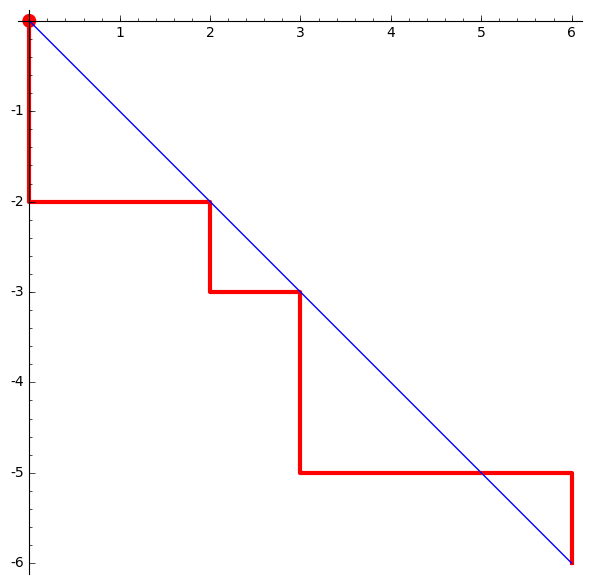

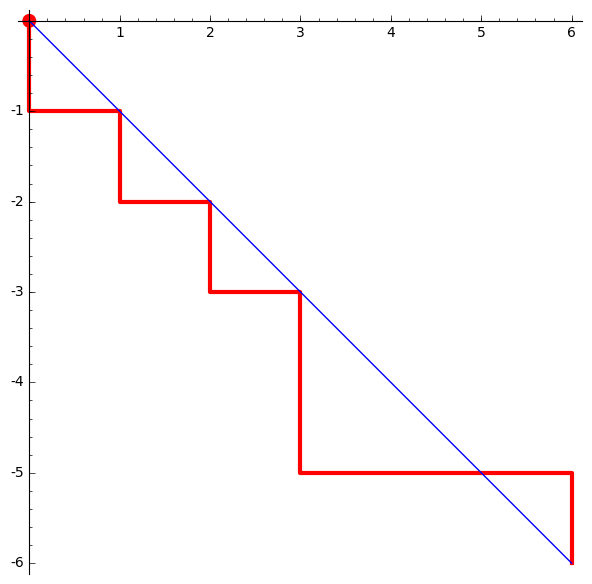

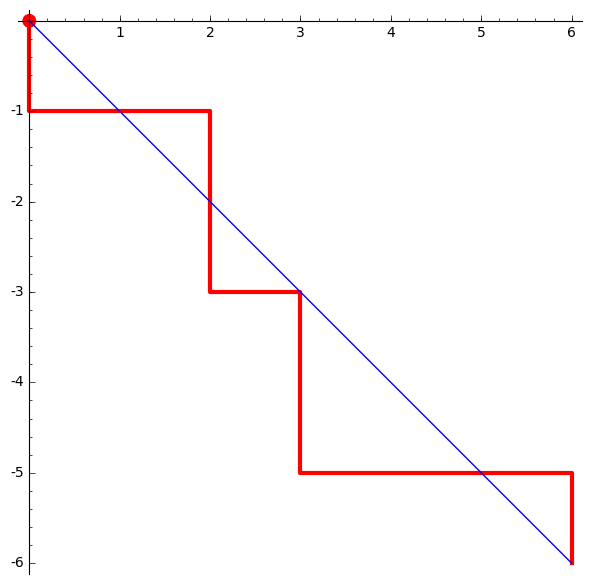

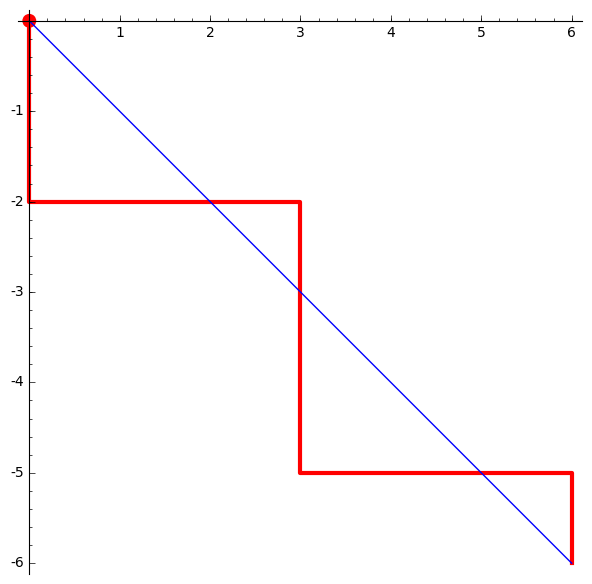

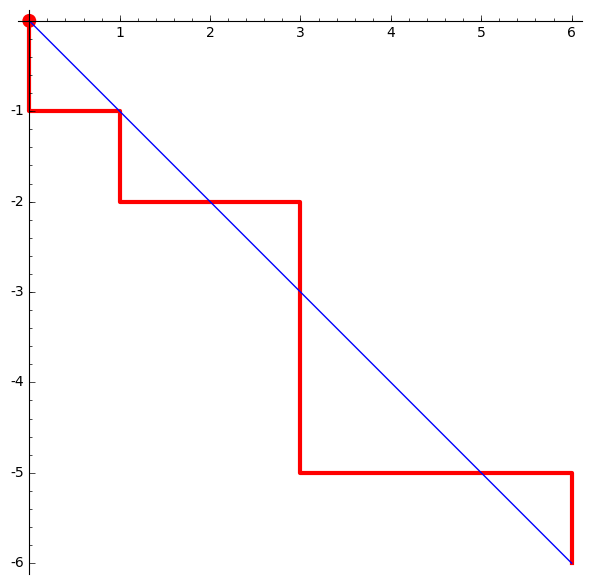

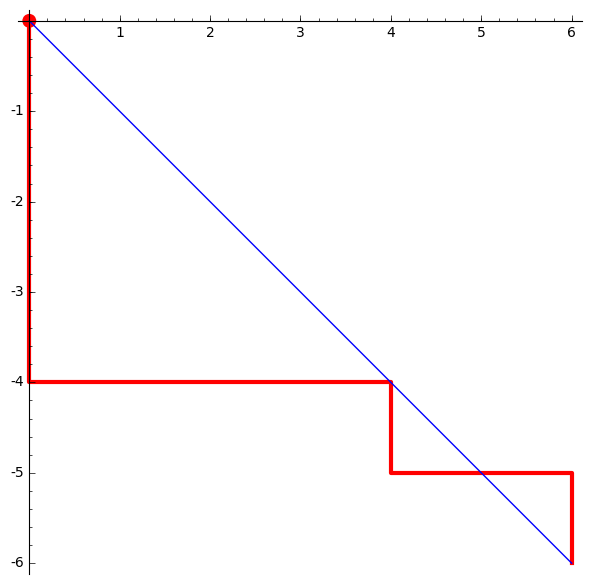

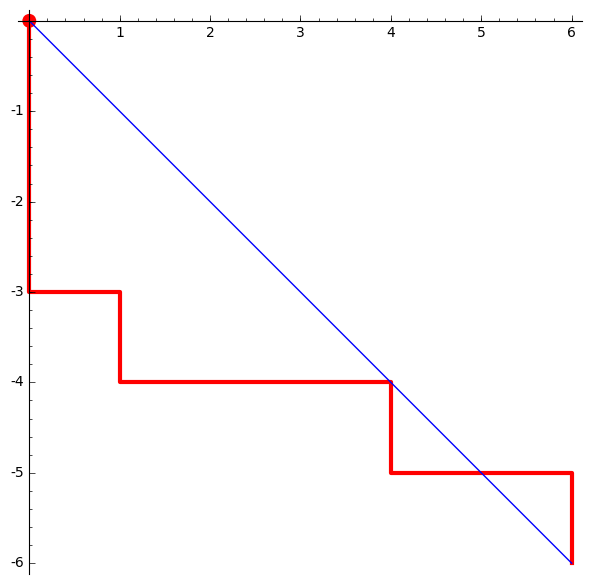

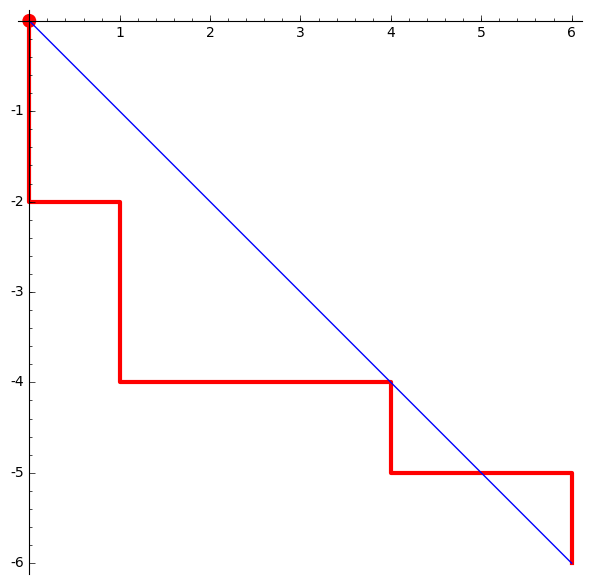

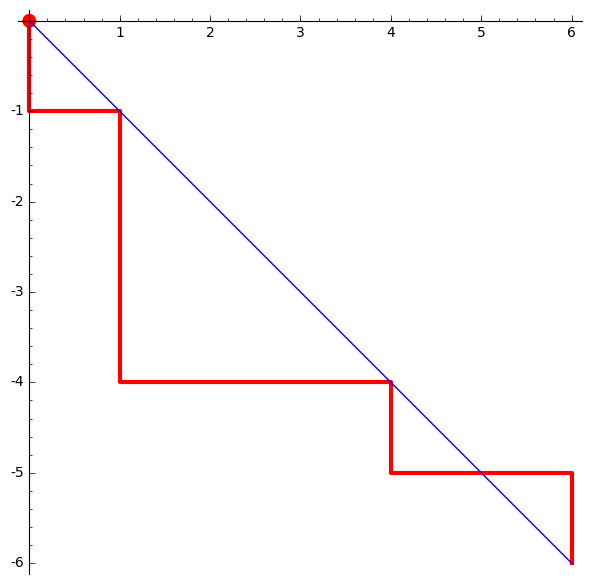

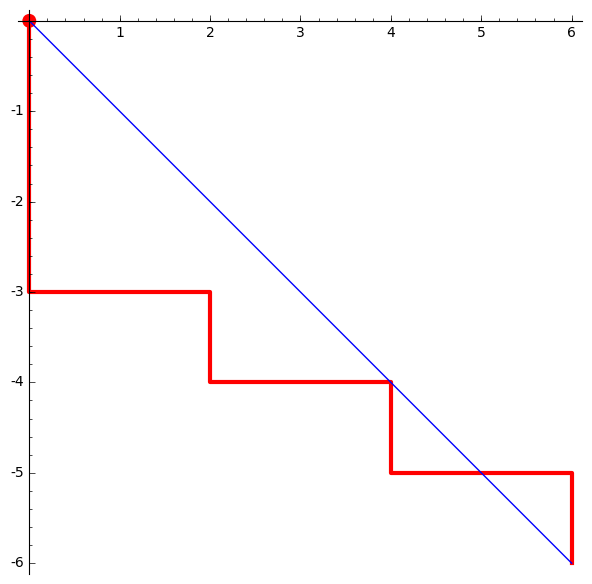

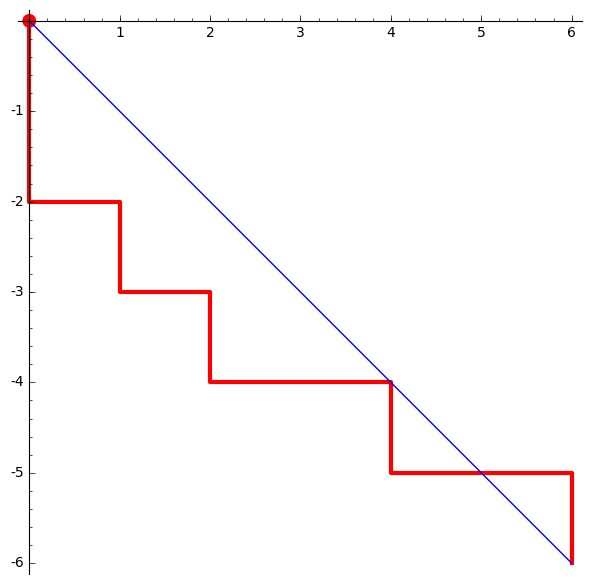

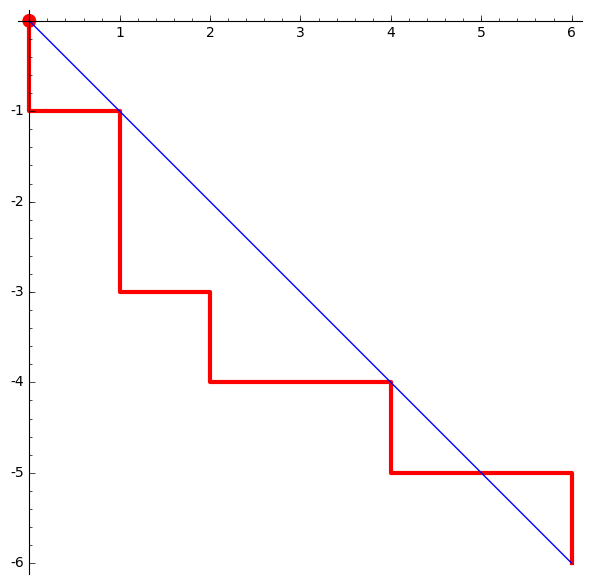

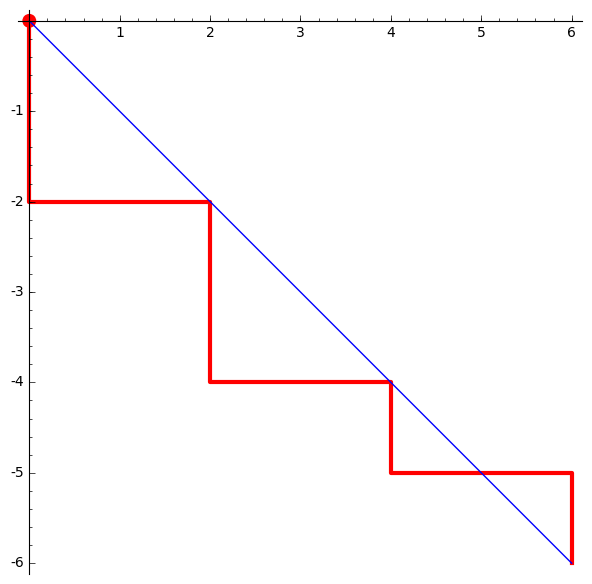

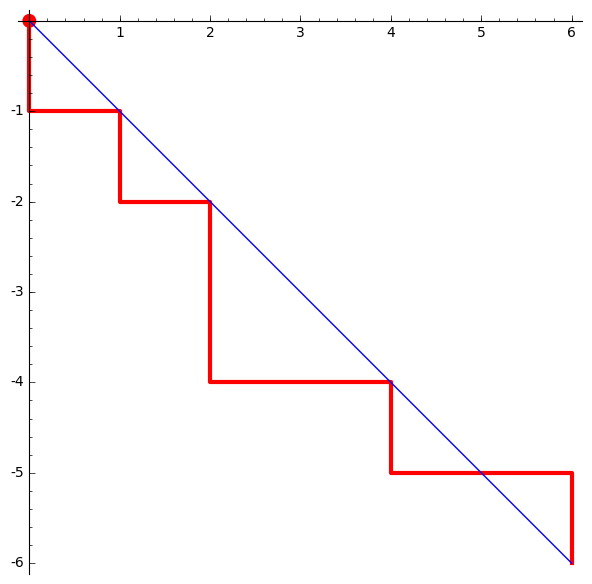

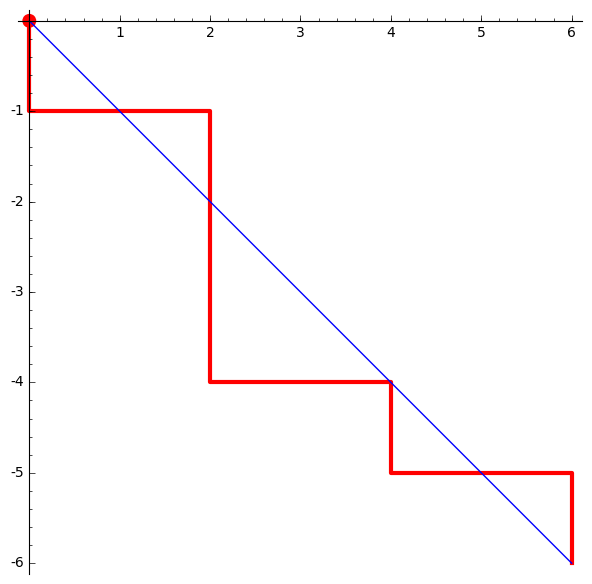

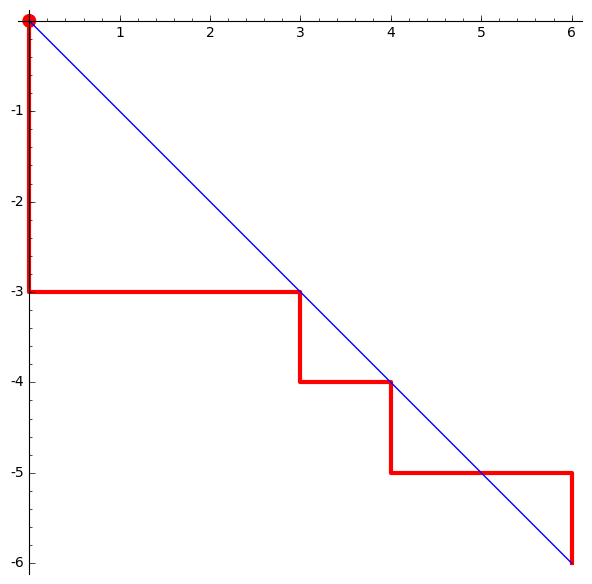

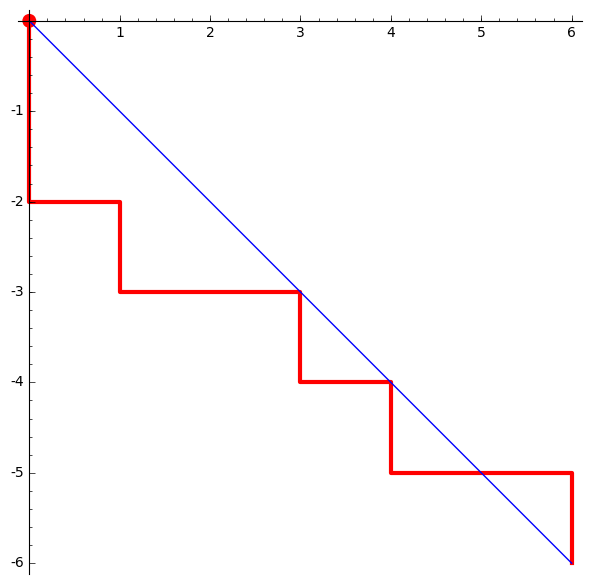

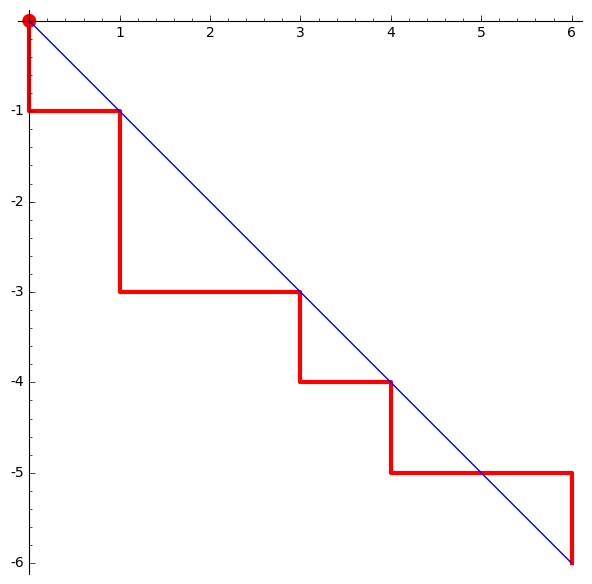

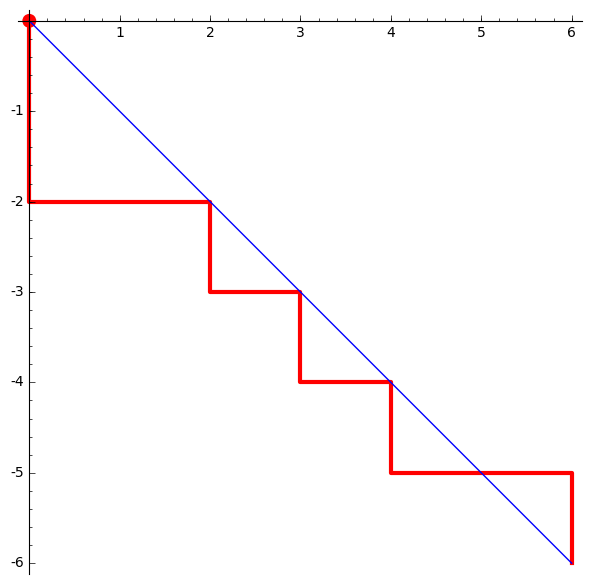

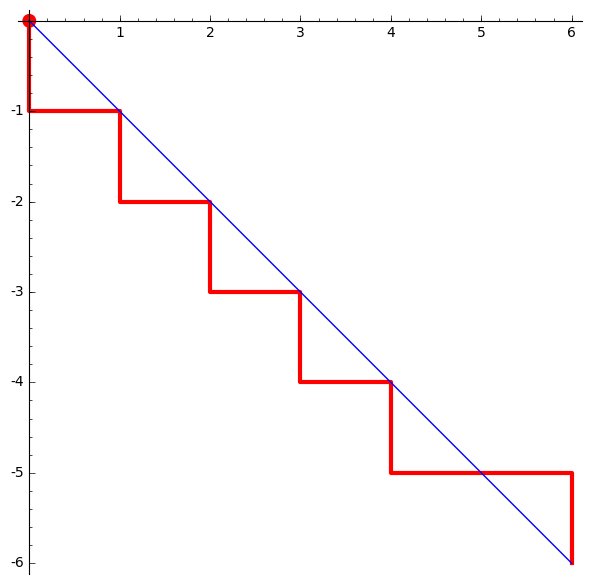

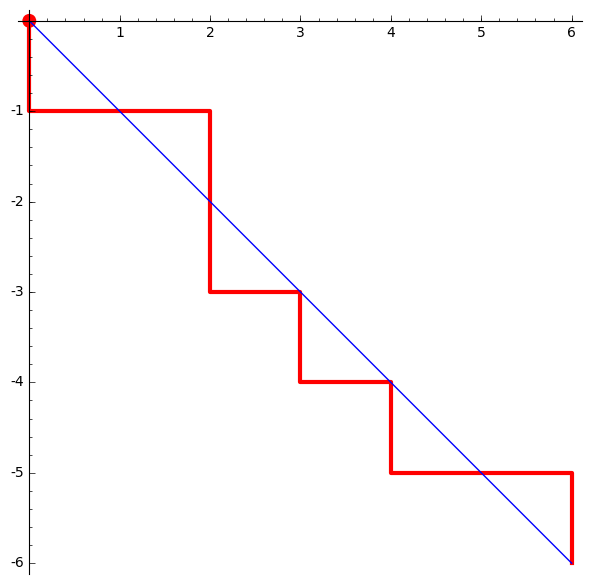

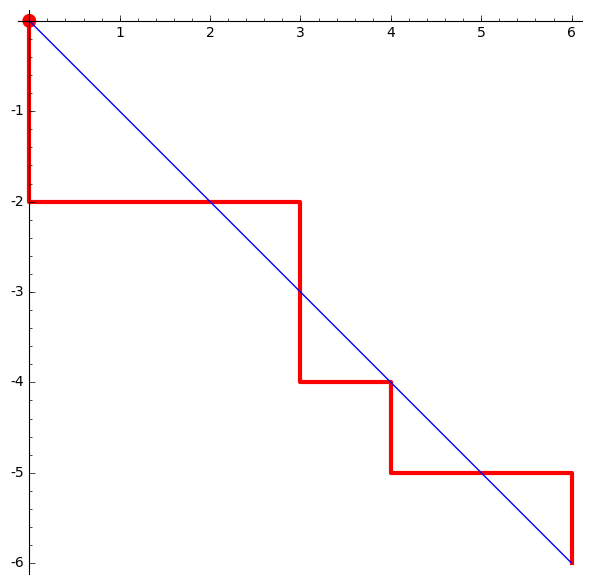

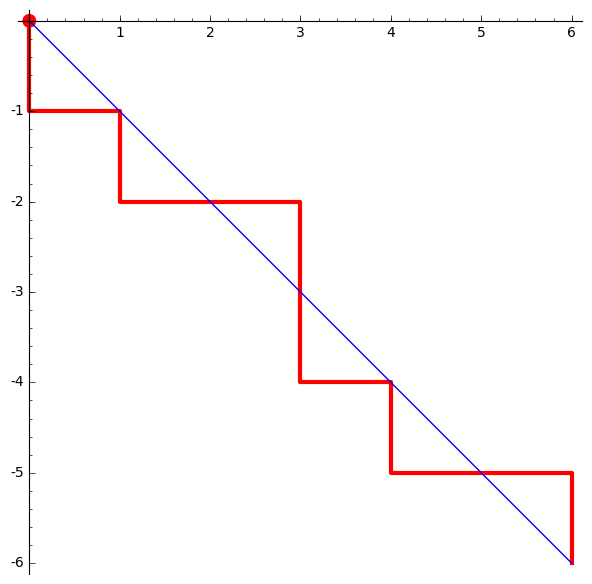

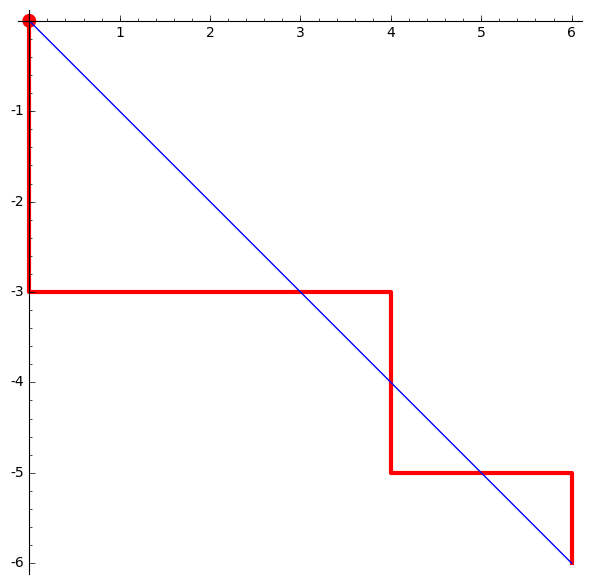

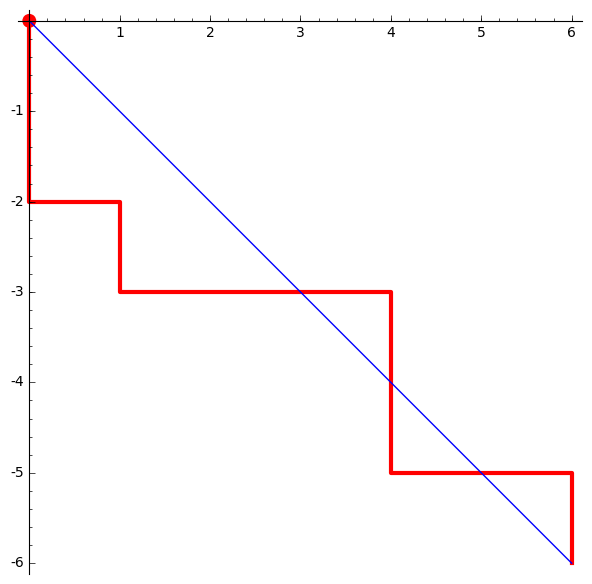

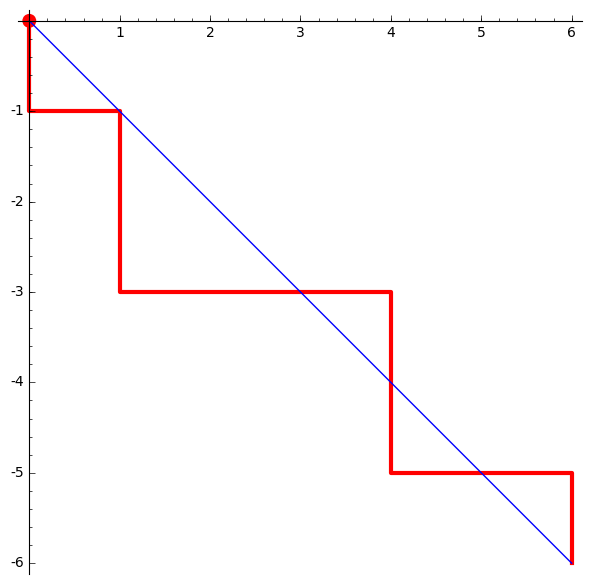

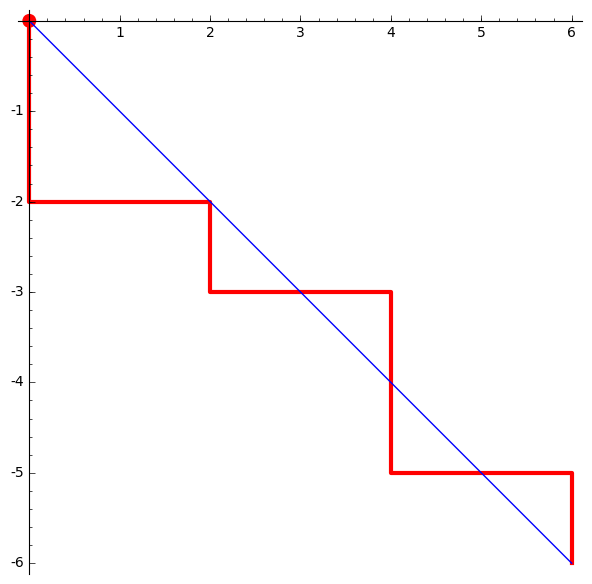

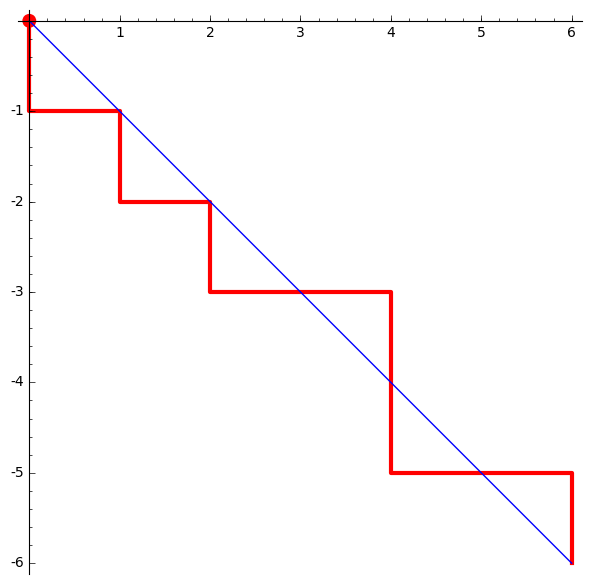

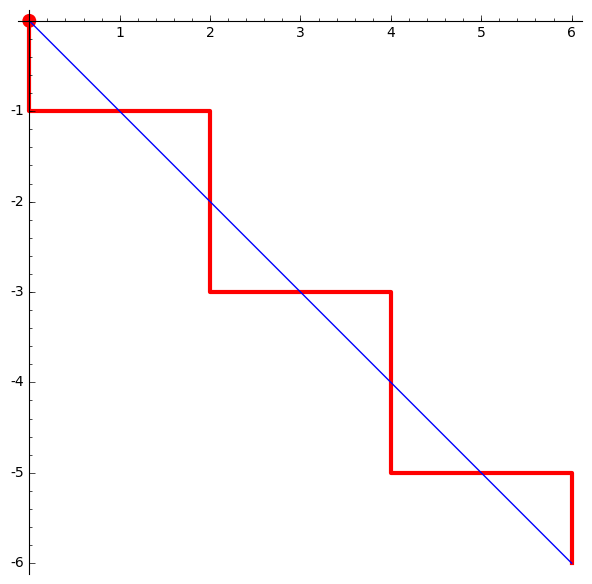

In [230]:
for X in bigOlList:
    show(drawDDyck(X))

In [236]:
lst=[]
for x in Arrangements([5,4,3,2,2,2,1],7):
    if is_NPF(x):
        lst.append(x)
lst

[[5, 4, 3, 2, 2, 2, 1],
 [5, 4, 3, 2, 2, 1, 2],
 [5, 4, 3, 2, 1, 2, 2],
 [5, 4, 3, 1, 2, 2, 2],
 [5, 4, 2, 3, 2, 2, 1],
 [5, 4, 2, 3, 2, 1, 2],
 [5, 4, 2, 3, 1, 2, 2],
 [5, 4, 2, 2, 3, 2, 1],
 [5, 4, 2, 2, 3, 1, 2],
 [5, 4, 2, 2, 2, 3, 1],
 [5, 4, 2, 2, 2, 1, 3],
 [5, 4, 2, 2, 1, 3, 2],
 [5, 4, 2, 2, 1, 2, 3],
 [5, 4, 2, 1, 3, 2, 2],
 [5, 4, 2, 1, 2, 3, 2],
 [5, 4, 2, 1, 2, 2, 3],
 [5, 4, 1, 3, 2, 2, 2],
 [5, 4, 1, 2, 3, 2, 2],
 [5, 4, 1, 2, 2, 3, 2],
 [5, 4, 1, 2, 2, 2, 3],
 [5, 3, 4, 2, 2, 2, 1],
 [5, 3, 4, 2, 2, 1, 2],
 [5, 3, 4, 2, 1, 2, 2],
 [5, 3, 4, 1, 2, 2, 2],
 [5, 3, 2, 4, 2, 2, 1],
 [5, 3, 2, 4, 2, 1, 2],
 [5, 3, 2, 4, 1, 2, 2],
 [5, 3, 2, 2, 4, 2, 1],
 [5, 3, 2, 2, 4, 1, 2],
 [5, 3, 2, 2, 2, 4, 1],
 [5, 3, 2, 2, 2, 1, 4],
 [5, 3, 2, 2, 1, 4, 2],
 [5, 3, 2, 2, 1, 2, 4],
 [5, 3, 2, 1, 4, 2, 2],
 [5, 3, 2, 1, 2, 4, 2],
 [5, 3, 2, 1, 2, 2, 4],
 [5, 3, 1, 4, 2, 2, 2],
 [5, 3, 1, 2, 4, 2, 2],
 [5, 3, 1, 2, 2, 4, 2],
 [5, 3, 1, 2, 2, 2, 4],
 [5, 2, 4, 3, 2, 2, 1],
 [5, 2, 4, 3, 2,

In [237]:
len(lst)

840

In [238]:
len(Arrangements([5,4,3,2,2,2,1],7))

840